# Homework 1

### Deadline: Monday 24 March 2024 (by 19h00)

### Credits: 20 points

### Instructions:

- When you finish, please submit a single **.ipynb** file via email to wbanda@yachaytech.edu.ec


- The homework is **individual**. Please include your name in the notebook.


- Within a **single python notebook**, solve the following problems.

# Name: 

## 1. Population dynamics (8 points)

The system of ordinary differential equations (ODEs) describing the population dynamics of two prey species ($x$ and $y$) and one predator species ($z$) is given by:


\begin{aligned}
\frac{dx}{dt} &= g_1\,x \left( 1 - \frac{x}{c_1} \right) - p_1\,x\,z, \\
\frac{dy}{dt} &= g_2\,y \left( 1 - \frac{y}{c_2} \right) - p_2\,y\,z, \\
\frac{dz}{dt} &= e_1\,p_1\,x\,z + e_2\,p_2\,y\,z - d\,z.
\end{aligned}


where:

- $g_1$, $g_2$ are the intrinsic growth rates (e.g. birth rates) of the prey populations,

- $c_1$, $c_2$ are the carrying capacities of the prey populations (the carrying capacity of an environment is the maximum population size of a biological species that can be sustained by that specific environment), 
  
- $p_1$, $p_2$ are the predation rates of the predator on each prey (e.g. how successful a hunt is),

- $e_1$, $e_2$ are the conversion efficiencies of consumed prey into predator biomass (the conversion efficiency tells us how efficiently a predator can use the energy from its prey to reproduce),

- $d$ is the natural death rate of the predator. Note that the death rates of the two prey species are intrinsically given by their individual carrying capacities.

This system models the interactions where both prey species grow logistically but are consumed by a common predator.

### State vector and slope:

**(a)** Write down this system of ODEs in terms of the system state vector $S(t)$, i.e. $\frac{dS}{dt} = F(S)$. Identify the slope function $F(S)$ and indicate whether or not it can be explicitly written as a function of $S$. Create a python function for the slope $F(S)$.

### ODE integration methods:

**(b)** Create a python function that implements a trapezoidal Euler method for ODE integration.

**(c)** Design your own third-order RK method (RK3), and create a python function for this integrator.

**(d)** Write a python function for the **Butcher's Runge-Kutta method**, which is a popular method for integrating ODEs with a high order of accuracy. It is obtained by following a similar approach to the one we discussed in class. This method uses six points $k_1, k_2, k_3$, $k_4$, $k_5$, and $k_6$. A weighted average of these points is used to produce the approximation of the solution. The algorithm relies on computing the following slopes:

$$
\begin{eqnarray*}
k_1 & = & F(t_j,S(t_j))\\
k_2 & = & F\left(t_j+\frac{h}{4},S(t_j)+\frac{1}{4}k_1h\right)\\
k_3 & = & F\left(t_j+\frac{h}{4},S(t_j)+\frac{1}{8}k_1h+\frac{1}{8}k_2h\right)\\
k_4 & = & F\left(t_j+\frac{h}{2},S(t_j)-\frac{1}{2}k_2h+k_3h\right)\\
k_5 & = & F\left(t_j+\frac{3h}{4},S(t_j)+\frac{3}{16}k_1h+\frac{9}{16}k_4h\right)\\
k_6 & = & F\left(t_j+h,S(t_j)-\frac{3}{7}k_1h+\frac{2}{7}k_2h+\frac{12}{7}k_3h-\frac{12}{7}k_4h+\frac{8}{7}k_5h\right)
\end{eqnarray*}
$$

The solution is then constructed with the step size ($h$, same as `dt`)as follows:

$$
S(t_{j+1}) = S(t_j) + \frac{h}{90}\left(7k_1 + 32k_3 + 12k_4 + 32k_5+7k_6\right).
$$

### Settings and initial conditions:

**(e)** Create a dictionary that allocates all the user-defined initial conditions needed for integration, including an option for the user to select the integration method. The default parameters in the dictionary should be:

| Parameter | Value | Description |
|---|---|---|
| `g1` | 1.0 | Growth rate of prey 1 |
| `c1` | 200.0 | Carrying capacity of prey 1 |
| `p1` | 0.01 | Predation rate of predator on prey 1 |
| `g2` | 1.2 | Growth rate of prey 2 |
| `c2` | 150.0 | Carrying capacity of prey 2 |
| `p2` | 0.008 | Predation rate of predator on prey 2 |
| `e1` | 0.08 | Conversion efficiency of prey 1 to predator |
| `e2` | 0.07 | Conversion efficiency of prey 2 to predator |
| `d` | 0.15 | Death rate of predator |
| `x0` | 100.0 | Initial population of prey 1 |
| `y0` | 80.0 | Initial population of prey 2 |
| `z0` | 20.0 | Initial population of predator |
| `t_span` | (0, 200) | Time span for simulation |
| `dt` | 0.01 | Time step size ($=h$) |
| `method` | RK3 | Integration method |

### Time stepping:

**(f)** Create a python function that integrates the system of ODEs using the settings and initial conditions as arguments. The function should perform integration for all three methods (according to the option `method`) and return the resulting times ($t$) and system states $S(t)$ as arrays.

### Plotting function:

**(g)** Create a python function that takes the times ($t$) and system states $S(t)$ as arguments and returns a 3-panel figure showing the evolution of each species ($x$, $y$, and $z$) in the system as a function of time, $t$.

### Simulation:

**(h)** Call your time-stepping and plotting functions to run and display the results of three simulations (one per integration method), using the default settings and initial conditions from the table in (e). Based on your simulations, does the system reach equilibrium?


Running simulation with RK3 method...


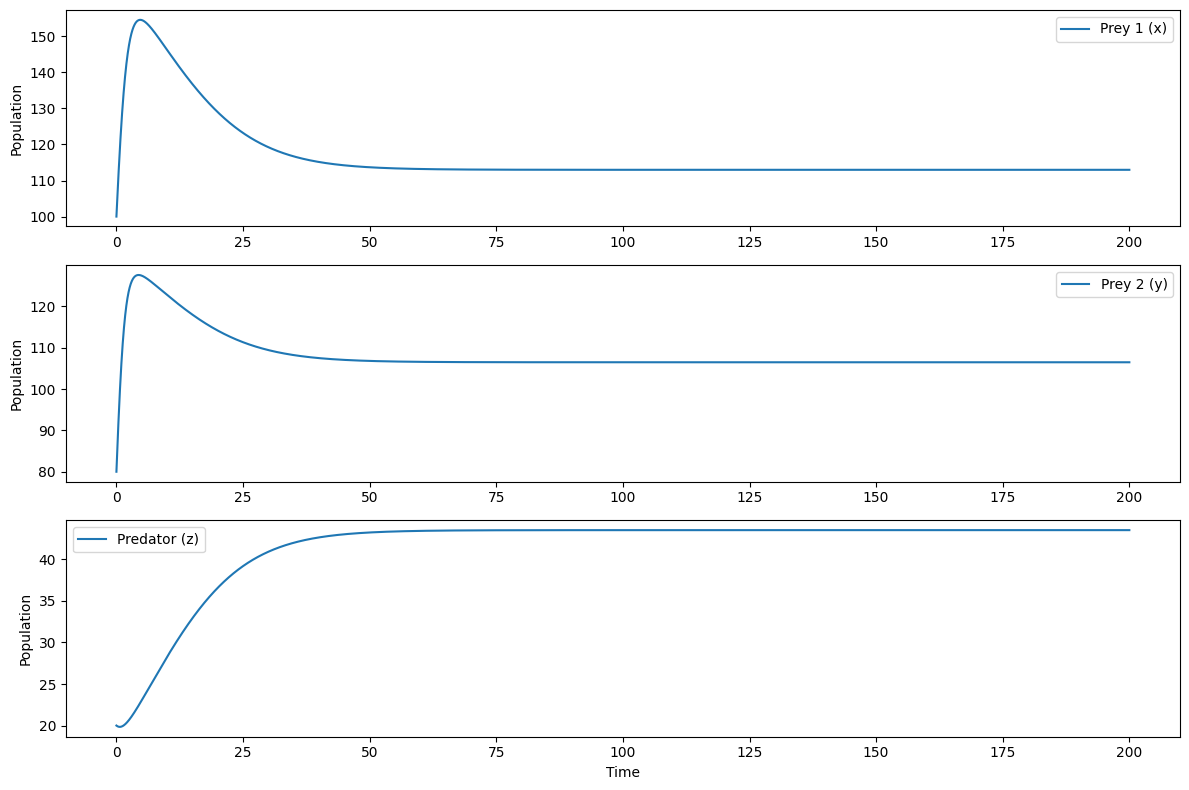

Equilibrium reached: True
Running simulation with Butcher method...


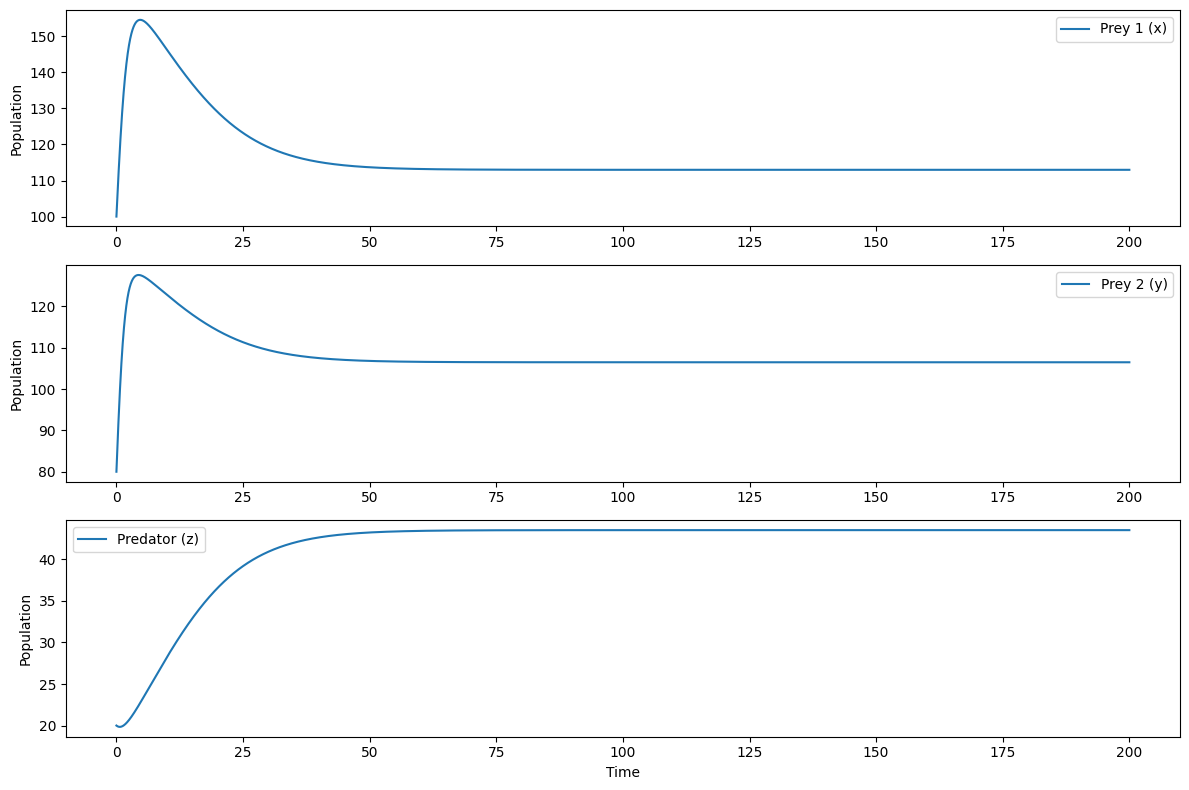

Equilibrium reached: True
Running simulation with Trapezoidal method...


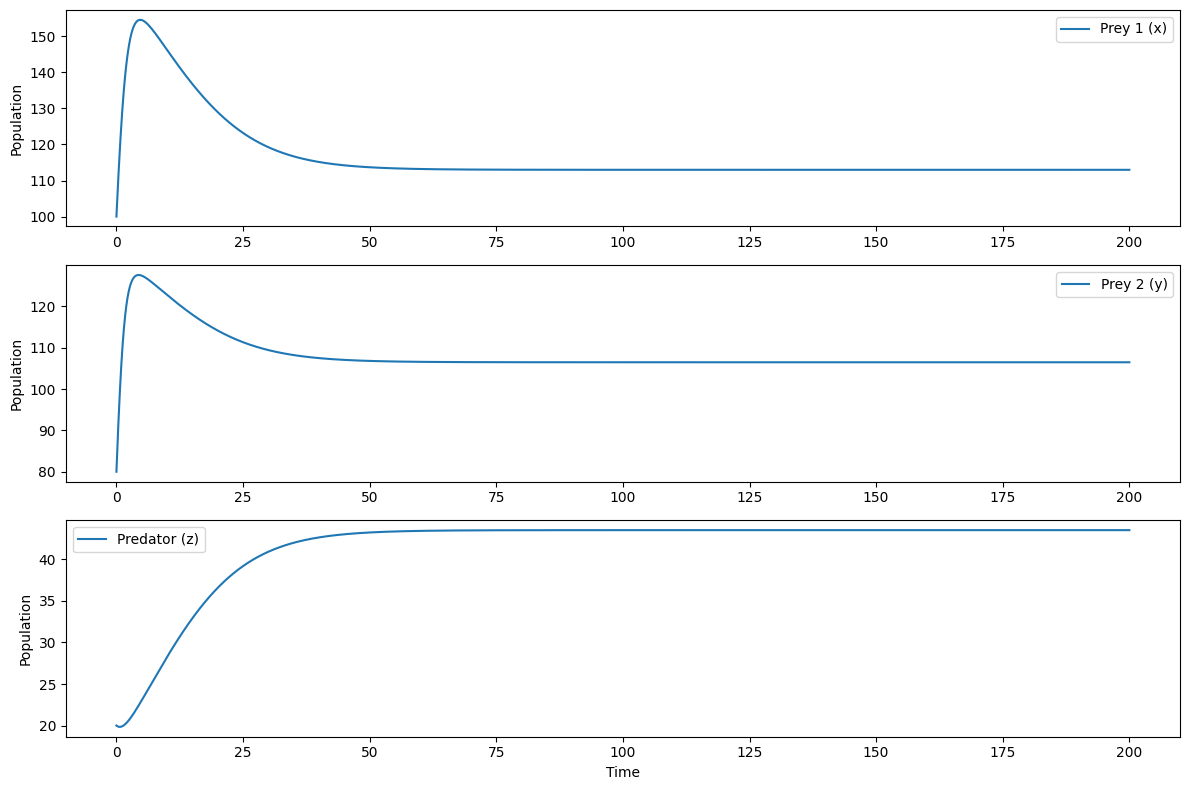

Equilibrium reached: True


In [1]:
# Add necessary imports first
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# Name:
# Adding my name here

# 1. Population dynamics (8 points)

# (a) Write down the system of ODEs in terms of state vector and create slope function

def slope_function(t, S, params):
    """
    Computes the slope of the system of ODEs for population dynamics.
    
    Parameters:
    ----------
    t : float
        Current time (not used, but included for compatibility with solvers)
    S : numpy.ndarray
        State vector [x, y, z]
    params : dict
        Dictionary containing model parameters
        
    Returns:
    -------
    numpy.ndarray
        Slope vector [dx/dt, dy/dt, dz/dt]
    """
    # Extract state variables
    x, y, z = S
    
    # Extract parameters
    g1 = params['g1']
    c1 = params['c1']
    p1 = params['p1']
    g2 = params['g2']
    c2 = params['c2']
    p2 = params['p2']
    e1 = params['e1']
    e2 = params['e2']
    d = params['d']
    
    # Calculate slopes based on the ODE system
    dx_dt = g1*x*(1 - x/c1) - p1*x*z
    dy_dt = g2*y*(1 - y/c2) - p2*y*z
    dz_dt = e1*p1*x*z + e2*p2*y*z - d*z
    
    return np.array([dx_dt, dy_dt, dz_dt])

# (b) Trapezoidal Euler method

def trapezoidal_euler(slope_func, t_span, S0, dt, params):
    """
    Implements the trapezoidal Euler method for ODE integration.
    
    Parameters:
    ----------
    slope_func : function
        Function that computes the slope
    t_span : tuple
        (t_start, t_end) tuple for the integration period
    S0 : numpy.ndarray
        Initial state vector
    dt : float
        Time step size
    params : dict
        Dictionary containing model parameters
        
    Returns:
    -------
    tuple
        (t, S) where t is an array of time points and S is an array of state vectors
    """
    t_start, t_end = t_span
    steps = int((t_end - t_start) / dt) + 1
    
    t = np.linspace(t_start, t_end, steps)
    S = np.zeros((steps, len(S0)))
    S[0] = S0
    
    for i in range(1, steps):
        # Calculate slope at current state
        k1 = slope_func(t[i-1], S[i-1], params)
        
        # Estimate next state using Euler method
        S_pred = S[i-1] + dt * k1
        
        # Calculate slope at predicted state
        k2 = slope_func(t[i], S_pred, params)
        
        # Use average slope to get final next state
        S[i] = S[i-1] + dt/2 * (k1 + k2)
    
    return t, S

# (c) Third-order RK method (RK3)

def rk3(slope_func, t_span, S0, dt, params):
    """
    Implements a third-order Runge-Kutta method for ODE integration.
    
    Parameters:
    ----------
    slope_func : function
        Function that computes the slope
    t_span : tuple
        (t_start, t_end) tuple for the integration period
    S0 : numpy.ndarray
        Initial state vector
        
    dt : float
        Time step size
    params : dict
        Dictionary containing model parameters
    
    Returns:
    -------
    tuple
        (t, S) where t is an array of time points and S is an array of state vectors
    """
    t_start, t_end = t_span
    steps = int((t_end - t_start) / dt) + 1
    
    t = np.linspace(t_start, t_end, steps)
    S = np.zeros((steps, len(S0)))
    S[0] = S0
    
    for i in range(1, steps):
        # Calculate slopes
        k1 = slope_func(t[i-1], S[i-1], params)
        k2 = slope_func(t[i-1] + dt/2, S[i-1] + dt/2 * k1, params)
        k3 = slope_func(t[i-1] + dt, S[i-1] - dt * k1 + 2 * dt * k2, params)
        
        # Update state
        S[i] = S[i-1] + dt/6 * (k1 + 4 * k2 + k3)
    
    return t, S

# (d) Butcher's Runge-Kutta method

def butcher_rk(slope_func, t_span, S0, dt, params):
    """
    Implements Butcher's Runge-Kutta method for ODE integration.
    
    Parameters:
    ----------
    slope_func : function
        Function that computes the slope
    t_span : tuple
        (t_start, t_end) tuple for the integration period
    S0 : numpy.ndarray
        Initial state vector
    dt : float
        Time step size
    params : dict
        Dictionary containing model parameters
    
    Returns:
    -------
    tuple
        (t, S) where t is an array of time points and S is an array of state vectors
    """
    t_start, t_end = t_span
    steps = int((t_end - t_start) / dt) + 1
    
    t = np.linspace(t_start, t_end, steps)
    S = np.zeros((steps, len(S0)))
    S[0] = S0
    
    for i in range(1, steps):
        # Calculate slopes
        k1 = slope_func(t[i-1], S[i-1], params)
        k2 = slope_func(t[i-1] + dt/4, S[i-1] + dt/4 * k1, params)
        k3 = slope_func(t[i-1] + dt/4, S[i-1] + dt/8 * k1 + dt/8 * k2, params)
        k4 = slope_func(t[i-1] + dt/2, S[i-1] - dt/2 * k2 + dt * k3, params)
        k5 = slope_func(t[i-1] + 3*dt/4, S[i-1] + 3*dt/16 * k1 + 9*dt/16 * k4, params)
        k6 = slope_func(t[i-1] + dt, S[i-1] - 3*dt/7 * k1 + 2*dt/7 * k2 + 12*dt/7 * k3 - 12*dt/7 * k4 + 8*dt/7 * k5, params)
        
        # Update state
        S[i] = S[i-1] + dt/90 * (7*k1 + 32*k3 + 12*k4 + 32*k5 + 7*k6)
    
    return t, S

# (e) Settings and initial conditions

default_params = {
    'g1': 1.0,
    'c1': 200.0,
    'p1': 0.01,
    'g2': 1.2,
    'c2': 150.0,
    'p2': 0.008,
    'e1': 0.08,
    'e2': 0.07,
    'd': 0.15,
    'x0': 100.0,
    'y0': 80.0,
    'z0': 20.0,
    't_span': (0, 200),
    'dt': 0.01,
    'method': 'RK3'
}

# (f) Time stepping function

def integrate_system(params):
    """
    Integrates the system of ODEs using the specified method and initial conditions.
    
    Parameters:
    ----------
    params : dict
        Dictionary containing model parameters and initial conditions
        
    Returns:
    -------
    tuple
        (t, S) where t is an array of time points and S is an array of state vectors
    """
    t_span = params['t_span']
    S0 = np.array([params['x0'], params['y0'], params['z0']])
    dt = params['dt']
    method = params['method']
    
    if method == 'RK3':
        return rk3(slope_function, t_span, S0, dt, params)
    elif method == 'Butcher':
        return butcher_rk(slope_function, t_span, S0, dt, params)
    else:
        return trapezoidal_euler(slope_function, t_span, S0, dt, params)

# (g) Plotting function

def plot_results(t, S):
    """
    Plots the evolution of each species in the system as a function of time.
    
    Parameters:
    ----------
    t : numpy.ndarray
        Array of time points
    S : numpy.ndarray
        Array of state vectors
    """
    fig = plt.figure(figsize=(12, 8))
    gs = GridSpec(3, 1, height_ratios=[1, 1, 1])
    
    ax1 = plt.subplot(gs[0])
    ax1.plot(t, S[:, 0], label='Prey 1 (x)')
    ax1.set_ylabel('Population')
    ax1.legend()
    
    ax2 = plt.subplot(gs[1])
    ax2.plot(t, S[:, 1], label='Prey 2 (y)')
    ax2.set_ylabel('Population')
    ax2.legend()
    
    ax3 = plt.subplot(gs[2])
    ax3.plot(t, S[:, 2], label='Predator (z)')
    ax3.set_xlabel('Time')
    ax3.set_ylabel('Population')
    ax3.legend()
    
    plt.tight_layout()
    plt.show()

# (h) Simulation

methods = ['RK3', 'Butcher', 'Trapezoidal']

for method in methods:
    print(f"Running simulation with {method} method...")
    params = default_params.copy()
    params['method'] = method
    t, S = integrate_system(params)
    plot_results(t, S)
    
    # Check if the system reaches equilibrium
    equilibrium = np.allclose(S[-1], S[-2], atol=1e-2)
    print(f"Equilibrium reached: {equilibrium}")


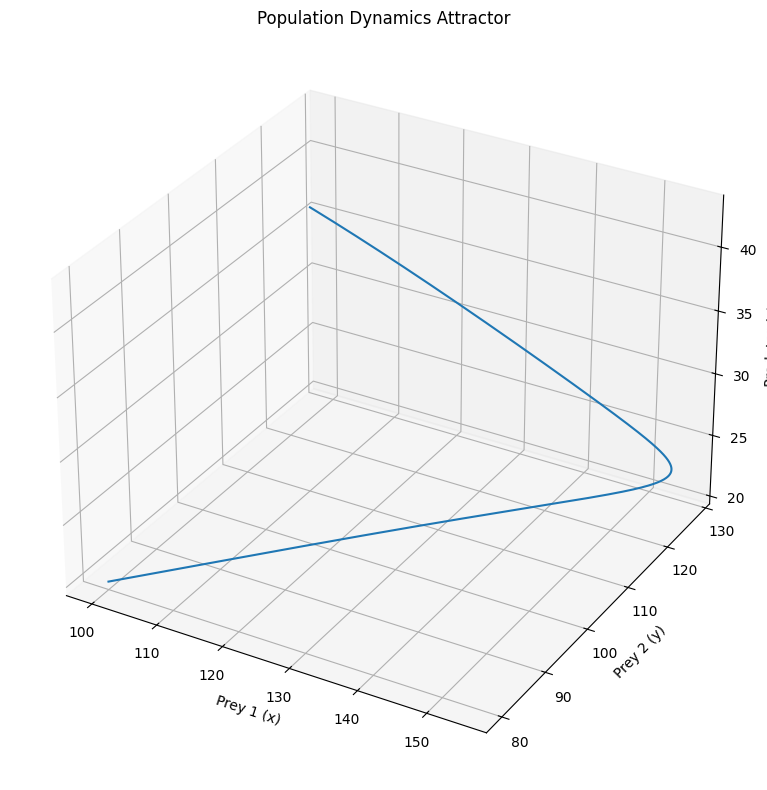

In [2]:
# Simple attractor visualization using the above code
# The following code will create a simple visualization of the attractor using the Butcher's Runge-Kutta method.

params = default_params.copy()
params['method'] = 'Butcher'
params['t_span'] = (0, 1000)
params['dt'] = 0.01

t, S = integrate_system(params)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot(S[:, 0], S[:, 1], S[:, 2])
ax.set_xlabel('Prey 1 (x)')
ax.set_ylabel('Prey 2 (y)')
ax.set_zlabel('Predator (z)')

plt.title('Population Dynamics Attractor')
plt.tight_layout()
plt.show()

## 2. Dynamical systems and equilibrium (5 points)

### Python class:

**(a)** Reorganise all your code from problem 1 into a single python class that contains attributes and methods. The settings and initial conditions should be attributes and all the python functions should become methods. Add a method to compute $L_2$-norm errors.

### Error analysis:

**(b)** Call the methods from your python class above to run $15$ simulations ($5$ simulations per integration method) for $5$ decreasing values of the time step size, `dt` (i.e. $h$). Then, compute the $L_2$-norm errors for all these $15$ runs and report the results in a single figure with the $L_2$-norm errors in the Y axis and $h$ in the X axis. Which method produces the most accurate results?

### Equilibrium conditions:

**(c)** Write down the equilibrium condition for the system, $S(t)$. Then, create a python function that uses sympy to study the equilibrium populations of $x$, $y$, and $z$ for a range of values of the natural death rate of the predator, $d$. The function should accept a range of $d$ values and return the equilibrium populations for all the $d$ values in the range. Ensure that the solutions are filtered to exclude extinction cases.

**(d)** After computing equilibrium solutions for multiple values of the predator mortality $d$, you should create a high-quality figure of the equilibrium populations of $x$, $y$, and $z$ (on the Y axis) versus $d$ (on the x-axis), and label what happens in the parameter regions outside of equilibrium conditions.

**(e)** Based on your analysis, for what range of $d$ values the system reaches equilibrium? What happens outside of that range? Call your class again to run and compare equilibrium versus extinction scenarios using $3$ different values of $d$.


In [7]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import sympy as sp
from scipy.integrate import solve_ivp
import warnings
warnings.filterwarnings('ignore')  # Ignore numerical warnings

class PopulationDynamics:
    """
    A class for simulating and analyzing population dynamics of a two-prey, one-predator ecosystem.
    """
    
    def __init__(self, params=None):
        """
        Initialize the population dynamics model with parameters.
        
        Parameters:
        ----------
        params : dict, optional
            Dictionary containing model parameters and settings
        """
        # Set default parameters if none provided
        self.default_params = {
            'g1': 1.0,      # Growth rate of prey 1
            'c1': 200.0,    # Carrying capacity of prey 1
            'p1': 0.01,     # Predation rate on prey 1
            'g2': 1.2,      # Growth rate of prey 2
            'c2': 150.0,    # Carrying capacity of prey 2
            'p2': 0.008,    # Predation rate on prey 2
            'e1': 0.08,     # Conversion efficiency for prey 1
            'e2': 0.07,     # Conversion efficiency for prey 2
            'd': 0.15,      # Death rate of predator
            'x0': 100.0,    # Initial population of prey 1
            'y0': 80.0,     # Initial population of prey 2
            'z0': 20.0,     # Initial population of predator
            't_span': (0, 200),  # Time span for simulation
            'dt': 0.01,     # Time step size
            'method': 'RK3' # Numerical method
        }
        
        # Update with user-provided parameters if any
        self.params = self.default_params.copy()
        if params:
            self.params.update(params)
        
        # Reference solution (for computing errors)
        self.reference_solution = None
    
    def slope_function(self, t, S):
        """
        Computes the slope of the system of ODEs for population dynamics.
        
        Parameters:
        ----------
        t : float
            Current time (not used, but included for compatibility)
        S : numpy.ndarray
            State vector [x, y, z]
            
        Returns:
        -------
        numpy.ndarray
            Slope vector [dx/dt, dy/dt, dz/dt]
        """
        # Extract state variables
        x, y, z = S
        
        # Extract parameters
        g1 = self.params['g1']
        c1 = self.params['c1']
        p1 = self.params['p1']
        g2 = self.params['g2']
        c2 = self.params['c2']
        p2 = self.params['p2']
        e1 = self.params['e1']
        e2 = self.params['e2']
        d = self.params['d']
        
        # Calculate slopes
        dx_dt = g1*x*(1 - x/c1) - p1*x*z
        dy_dt = g2*y*(1 - y/c2) - p2*y*z
        dz_dt = e1*p1*x*z + e2*p2*y*z - d*z
        
        return np.array([dx_dt, dy_dt, dz_dt])
    
    def trapezoidal_euler(self, t_span, S0, dt):
        """
        Implements the trapezoidal Euler method for ODE integration.
        
        Parameters:
        ----------
        t_span : tuple
            (t_start, t_end) tuple for the integration period
        S0 : numpy.ndarray
            Initial state vector
        dt : float
            Time step size
            
        Returns:
        -------
        tuple
            (t, S) where t is an array of time points and S is an array of state vectors
        """
        t_start, t_end = t_span
        steps = int((t_end - t_start) / dt) + 1
        
        t = np.linspace(t_start, t_end, steps)
        S = np.zeros((steps, len(S0)))
        S[0] = S0
        
        for i in range(1, steps):
            # Calculate slope at current state
            k1 = self.slope_function(t[i-1], S[i-1])
            
            # Estimate next state using Euler method
            S_pred = S[i-1] + dt * k1
            
            # Calculate slope at predicted state
            k2 = self.slope_function(t[i], S_pred)
            
            # Use average slope to get final next state
            S[i] = S[i-1] + dt/2 * (k1 + k2)
        
        return t, S
    
    def rk3(self, t_span, S0, dt):
        """
        Implements a third-order Runge-Kutta method for ODE integration.
        
        Parameters:
        ----------
        t_span : tuple
            (t_start, t_end) tuple for the integration period
        S0 : numpy.ndarray
            Initial state vector
        dt : float
            Time step size
            
        Returns:
        -------
        tuple
            (t, S) where t is an array of time points and S is an array of state vectors
        """
        t_start, t_end = t_span
        steps = int((t_end - t_start) / dt) + 1
        
        t = np.linspace(t_start, t_end, steps)
        S = np.zeros((steps, len(S0)))
        S[0] = S0
        
        for i in range(1, steps):
            # Calculate slopes
            k1 = self.slope_function(t[i-1], S[i-1])
            k2 = self.slope_function(t[i-1] + dt/2, S[i-1] + dt/2 * k1)
            k3 = self.slope_function(t[i-1] + dt, S[i-1] - dt * k1 + 2 * dt * k2)
            
            # Update state
            S[i] = S[i-1] + dt/6 * (k1 + 4 * k2 + k3)
        
        return t, S
    
    def butcher_rk(self, t_span, S0, dt):
        """
        Implements Butcher's Runge-Kutta method for ODE integration.
        
        Parameters:
        ----------
        t_span : tuple
            (t_start, t_end) tuple for the integration period
        S0 : numpy.ndarray
            Initial state vector
        dt : float
            Time step size
            
        Returns:
        -------
        tuple
            (t, S) where t is an array of time points and S is an array of state vectors
        """
        t_start, t_end = t_span
        steps = int((t_end - t_start) / dt) + 1
        
        t = np.linspace(t_start, t_end, steps)
        S = np.zeros((steps, len(S0)))
        S[0] = S0
        
        for i in range(1, steps):
            # Calculate slopes
            k1 = self.slope_function(t[i-1], S[i-1])
            k2 = self.slope_function(t[i-1] + dt/4, S[i-1] + dt/4 * k1)
            k3 = self.slope_function(t[i-1] + dt/4, S[i-1] + dt/8 * k1 + dt/8 * k2)
            k4 = self.slope_function(t[i-1] + dt/2, S[i-1] - dt/2 * k2 + dt * k3)
            k5 = self.slope_function(t[i-1] + 3*dt/4, S[i-1] + 3*dt/16 * k1 + 9*dt/16 * k4)
            k6 = self.slope_function(t[i-1] + dt, S[i-1] - 3*dt/7 * k1 + 2*dt/7 * k2 + 12*dt/7 * k3 - 12*dt/7 * k4 + 8*dt/7 * k5)
            
            # Update state
            S[i] = S[i-1] + dt/90 * (7*k1 + 32*k3 + 12*k4 + 32*k5 + 7*k6)
        
        return t, S
    
    def integrate_system(self):
        """
        Integrates the system of ODEs using the specified method and initial conditions.
        
        Returns:
        -------
        tuple
            (t, S) where t is an array of time points and S is an array of state vectors
        """
        t_span = self.params['t_span']
        S0 = np.array([self.params['x0'], self.params['y0'], self.params['z0']])
        dt = self.params['dt']
        method = self.params['method']
        
        if method == 'RK3':
            return self.rk3(t_span, S0, dt)
        elif method == 'Butcher':
            return self.butcher_rk(t_span, S0, dt)
        else:
            return self.trapezoidal_euler(t_span, S0, dt)
    
    def plot_results(self, t, S, title=None):
        """
        Plots the evolution of each species in the system as a function of time.
        
        Parameters:
        ----------
        t : numpy.ndarray
            Array of time points
        S : numpy.ndarray
            Array of state vectors
        title : str, optional
            Title for the plot
        """
        fig = plt.figure(figsize=(12, 8))
        gs = GridSpec(3, 1, height_ratios=[1, 1, 1])
        
        ax1 = plt.subplot(gs[0])
        ax1.plot(t, S[:, 0], label='Prey 1 (x)')
        ax1.set_ylabel('Population')
        ax1.legend()
        
        ax2 = plt.subplot(gs[1])
        ax2.plot(t, S[:, 1], label='Prey 2 (y)')
        ax2.set_ylabel('Population')
        ax2.legend()
        
        ax3 = plt.subplot(gs[2])
        ax3.plot(t, S[:, 2], label='Predator (z)')
        ax3.set_xlabel('Time')
        ax3.set_ylabel('Population')
        ax3.legend()
        
        if title:
            plt.suptitle(title)
        
        plt.tight_layout()
        plt.show()
    
    def generate_reference_solution(self):
        """
        Generate a high-accuracy reference solution using scipy's solve_ivp.
        
        Returns:
        -------
        tuple
            (t_ref, S_ref) reference solution
        """
        t_span = self.params['t_span']
        S0 = np.array([self.params['x0'], self.params['y0'], self.params['z0']])
        
        # Use scipy's solve_ivp with high accuracy settings
        sol = solve_ivp(
            lambda t, y: self.slope_function(t, y),
            t_span,
            S0,
            method='RK45',
            rtol=1e-10,
            atol=1e-10
        )
        
        self.reference_solution = (sol.t, sol.y.T)
        return self.reference_solution
    
    def calculate_l2_error(self, t, S):
        """
        Calculate the L2-norm error compared to a reference solution.
        
        Parameters:
        ----------
        t : numpy.ndarray
            Array of time points
        S : numpy.ndarray
            Array of state vectors
            
        Returns:
        -------
        float
            L2-norm error
        """
        if self.reference_solution is None:
            self.generate_reference_solution()
            
        t_ref, S_ref = self.reference_solution
        
        # Interpolate the computed solution at reference time points
        S_interp = np.zeros((len(t_ref), S.shape[1]))
        for i in range(S.shape[1]):
            # Simple linear interpolation
            S_interp[:, i] = np.interp(t_ref, t, S[:, i])
        
        # Calculate L2-norm error for each component and sum
        error = np.sqrt(np.mean((S_interp - S_ref)**2))
        return error
    
    def run_error_analysis(self, dt_values):
        """
        Run error analysis for different time step sizes and integration methods.
        
        Parameters:
        ----------
        dt_values : list
            List of dt values to test
            
        Returns:
        -------
        dict
            Dictionary with errors for each method and dt value
        """
        methods = ['Trapezoidal', 'RK3', 'Butcher']
        errors = {method: [] for method in methods}
        
        # Generate reference solution once
        self.generate_reference_solution()
        
        # Test each method with each dt value
        for method in methods:
            for dt in dt_values:
                print(f"Running {method} with dt={dt}")
                
                # Update parameters
                self.params['method'] = method
                self.params['dt'] = dt
                
                # Run simulation
                t, S = self.integrate_system()
                
                # Calculate error
                error = self.calculate_l2_error(t, S)
                errors[method].append(error)
        
        return dt_values, errors
    
    def plot_error_analysis(self, dt_values, errors):
        """
        Plot the results of the error analysis.
        
        Parameters:
        ----------
        dt_values : list
            List of dt values tested
        errors : dict
            Dictionary with errors for each method and dt value
        """
        plt.figure(figsize=(10, 6))
        
        for method, error_values in errors.items():
            plt.loglog(dt_values, error_values, 'o-', label=method)
        
        # Add theoretical slopes
        x = np.array([min(dt_values), max(dt_values)])
        plt.loglog(x, (x/x[0])**2 * errors['Trapezoidal'][0], 'k--', label='Slope 2')
        plt.loglog(x, (x/x[0])**3 * errors['RK3'][0]/5, 'k-.', label='Slope 3')
        
        plt.xlabel('Time Step Size (h)')
        plt.ylabel('L2-norm Error')
        plt.title('Error Analysis')
        plt.grid(True, which='both', linestyle='--', alpha=0.7)
        plt.legend()
        plt.tight_layout()
        plt.show()
    
    def find_equilibrium_points(self, d_values):
        """
        Find equilibrium points for different values of the predator death rate d
        using a more direct analytical approach.
        
        Parameters:
        ----------
        d_values : numpy.ndarray
            Array of d values to test
            
        Returns:
        -------
        dict
            Dictionary with equilibrium points for each d value
        """
        # Store results
        equilibrium_points = {
            'd': [],
            'x': [],
            'y': [],
            'z': []
        }
        
        # Get system parameters
        g1 = self.params['g1']
        c1 = self.params['c1']
        p1 = self.params['p1']
        g2 = self.params['g2']
        c2 = self.params['c2']
        p2 = self.params['p2']
        e1 = self.params['e1']
        e2 = self.params['e2']
        
        print("Solving for equilibrium points...")
        
        for d_val in d_values:
            try:
                # For the equilibrium to exist (with z > 0):
                # From dz/dt = 0: e1*p1*x + e2*p2*y = d
                # From dx/dt = 0: z = g1*(1 - x/c1)/p1
                # From dy/dt = 0: z = g2*(1 - y/c2)/p2
                
                # Since z values must be equal, we have:
                # g1*(1 - x/c1)/p1 = g2*(1 - y/c2)/p2
                
                # Solve for y in terms of x:
                # y = c2*(1 - p2*g1*(1 - x/c1)/(p1*g2))
                
                # Substitute into e1*p1*x + e2*p2*y = d to get equation for x
                
                # Use numerical approach for simplicity
                def f(x):
                    # Calculate y from x
                    y = c2 * (1 - p2 * g1 * (1 - x / c1) / (p1 * g2))
                    # Calculate z
                    z = g1 * (1 - x / c1) / p1
                    # Left side of equation e1*p1*x + e2*p2*y = d
                    return e1 * p1 * x + e2 * p2 * y - d_val
                
                # Try to find x in a reasonable range
                from scipy.optimize import brentq
                try:
                    # Start with values that should be in the feasible range
                    x_min = 0.1
                    x_max = c1 * 0.99  # Just below carrying capacity
                    
                    # Find root of f(x)
                    x_val = brentq(f, x_min, x_max)
                    
                    # Calculate corresponding y and z
                    y_val = c2 * (1 - p2 * g1 * (1 - x_val / c1) / (p1 * g2))
                    z_val = g1 * (1 - x_val / c1) / p1
                    
                    # Check if all values are positive and realistic
                    if x_val > 0 and y_val > 0 and z_val > 0 and x_val < c1 and y_val < c2:
                        equilibrium_points['d'].append(d_val)
                        equilibrium_points['x'].append(x_val)
                        equilibrium_points['y'].append(y_val)
                        equilibrium_points['z'].append(z_val)
                except ValueError:
                    # No root found in the interval, which means no equilibrium
                    pass
                    
            except Exception as e:
                print(f"Error for d = {d_val}: {str(e)}")
        
        if not equilibrium_points['d']:
            print("No equilibrium points found! Try a different range of d values.")
        else:
            print(f"Found {len(equilibrium_points['d'])} equilibrium points.")
        
        return equilibrium_points
    
    def plot_equilibrium_analysis(self, equilibrium_points):
        """
        Plot the equilibrium points against the predator death rate d.
        
        Parameters:
        ----------
        equilibrium_points : dict
            Dictionary with equilibrium points for each d value
        """
        plt.figure(figsize=(12, 8))
        
        plt.plot(equilibrium_points['d'], equilibrium_points['x'], 'b-', label='Prey 1 (x)')
        plt.plot(equilibrium_points['d'], equilibrium_points['y'], 'g-', label='Prey 2 (y)')
        plt.plot(equilibrium_points['d'], equilibrium_points['z'], 'r-', label='Predator (z)')
        
        # Add vertical lines for region boundaries
        min_d = min(equilibrium_points['d'])
        max_d = max(equilibrium_points['d'])
        
        plt.axvspan(0, min_d, alpha=0.2, color='green', label='Predator Extinction')
        plt.axvspan(max_d, max_d*1.5, alpha=0.2, color='red', label='System Instability')
        
        plt.xlabel('Predator Death Rate (d)')
        plt.ylabel('Equilibrium Population')
        plt.title('Equilibrium Populations vs. Predator Death Rate')
        plt.grid(True)
        plt.legend()
        plt.tight_layout()
        plt.show()
    
    def compare_scenarios(self, d_values):
        """
        Compare population dynamics for different values of d.
        
        Parameters:
        ----------
        d_values : list
            List of d values to compare
        """
        original_d = self.params['d']
        original_method = self.params['method']
        
        # Set to a high-accuracy method
        self.params['method'] = 'Butcher'
        
        for d_val in d_values:
            self.params['d'] = d_val
            t, S = self.integrate_system()
            
            # Check if equilibrium is reached
            final_slope = np.abs(self.slope_function(t[-1], S[-1]))
            eq_reached = np.all(final_slope < 0.01)
            
            title = f"Population Dynamics with d = {d_val}"
            if eq_reached:
                title += " (Equilibrium Reached)"
            else:
                title += " (No Equilibrium)"
            
            self.plot_results(t, S, title)
        
        # Restore original values
        self.params['d'] = original_d
        self.params['method'] = original_method

Running Trapezoidal with dt=0.1
Running Trapezoidal with dt=0.05
Running Trapezoidal with dt=0.01
Running Trapezoidal with dt=0.005
Running Trapezoidal with dt=0.001
Running RK3 with dt=0.1
Running RK3 with dt=0.05
Running RK3 with dt=0.01
Running RK3 with dt=0.005
Running RK3 with dt=0.001
Running Butcher with dt=0.1
Running Butcher with dt=0.05
Running Butcher with dt=0.01
Running Butcher with dt=0.005
Running Butcher with dt=0.001


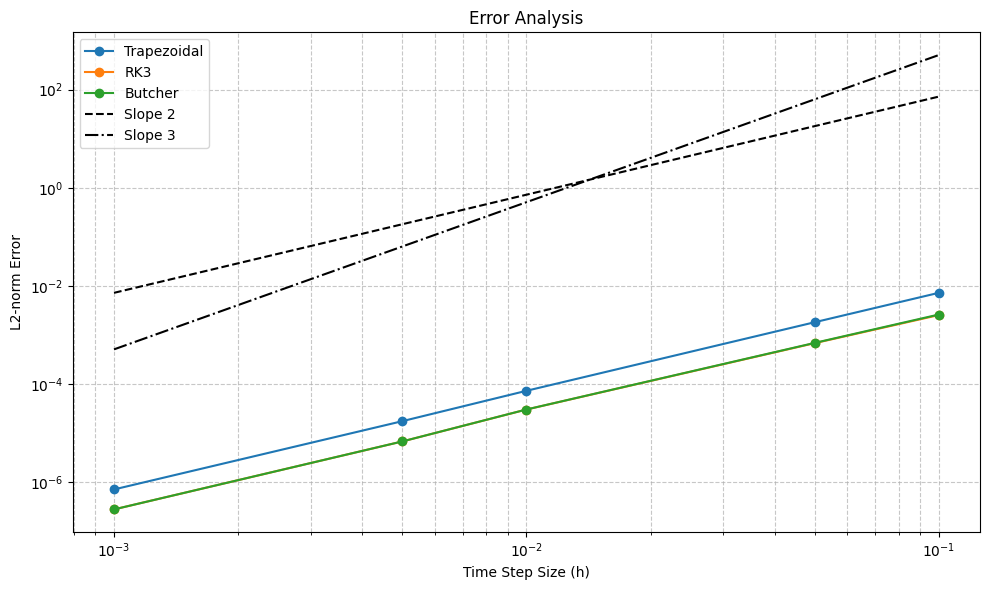

In [8]:
# Create an instance of the population dynamics class
pop_dynamics = PopulationDynamics()

# Define decreasing time step sizes for error analysis
dt_values = [0.1, 0.05, 0.01, 0.005, 0.001]

# Run error analysis
dt_values, errors = pop_dynamics.run_error_analysis(dt_values)

# Plot results
pop_dynamics.plot_error_analysis(dt_values, errors)

Solving for equilibrium points...
Found 43 equilibrium points.
Equilibrium points found for d values:
Range of d values with equilibrium: 0.029797979797979796 to 0.23767676767676768
Number of equilibrium points found: 43


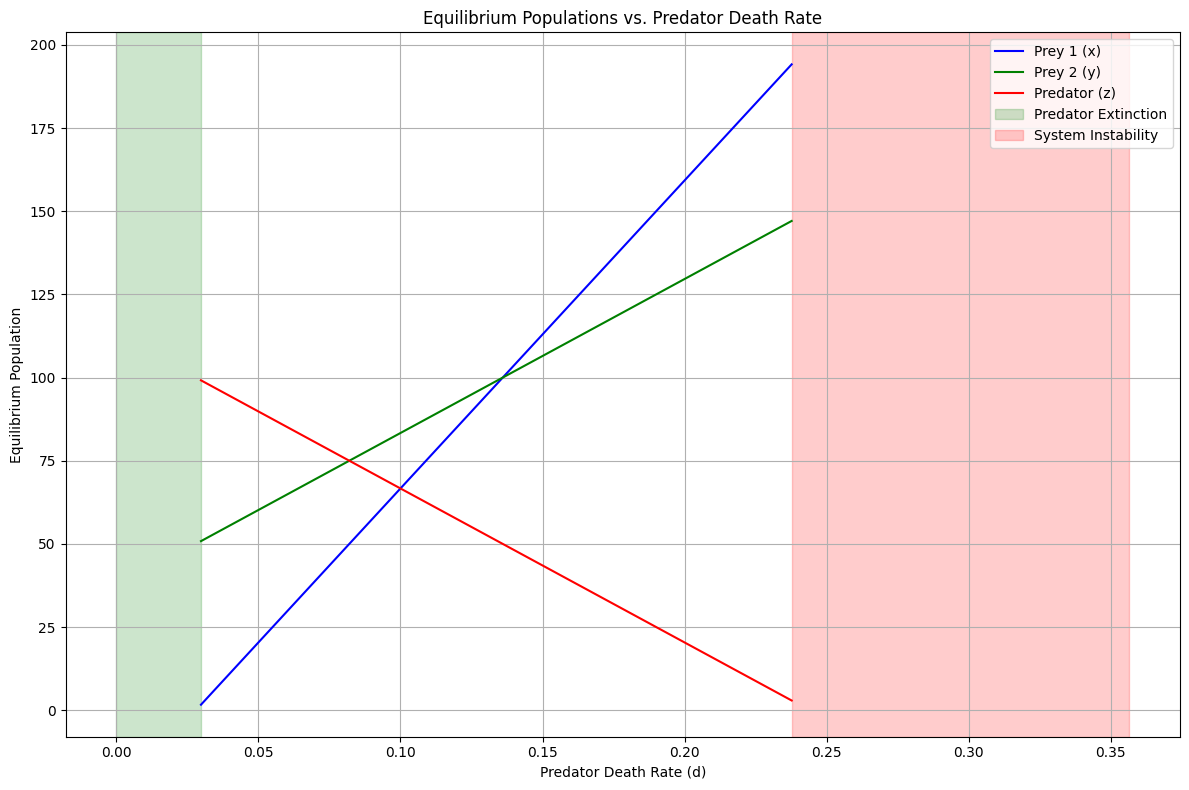

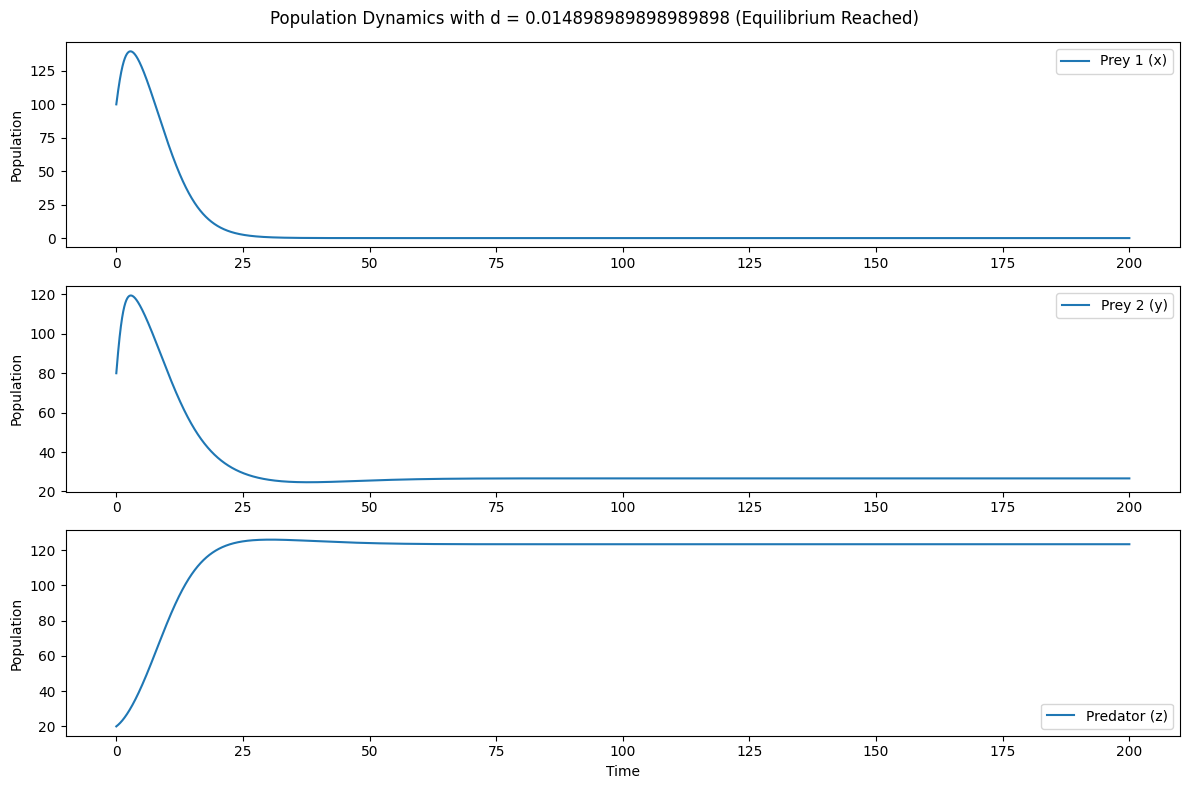

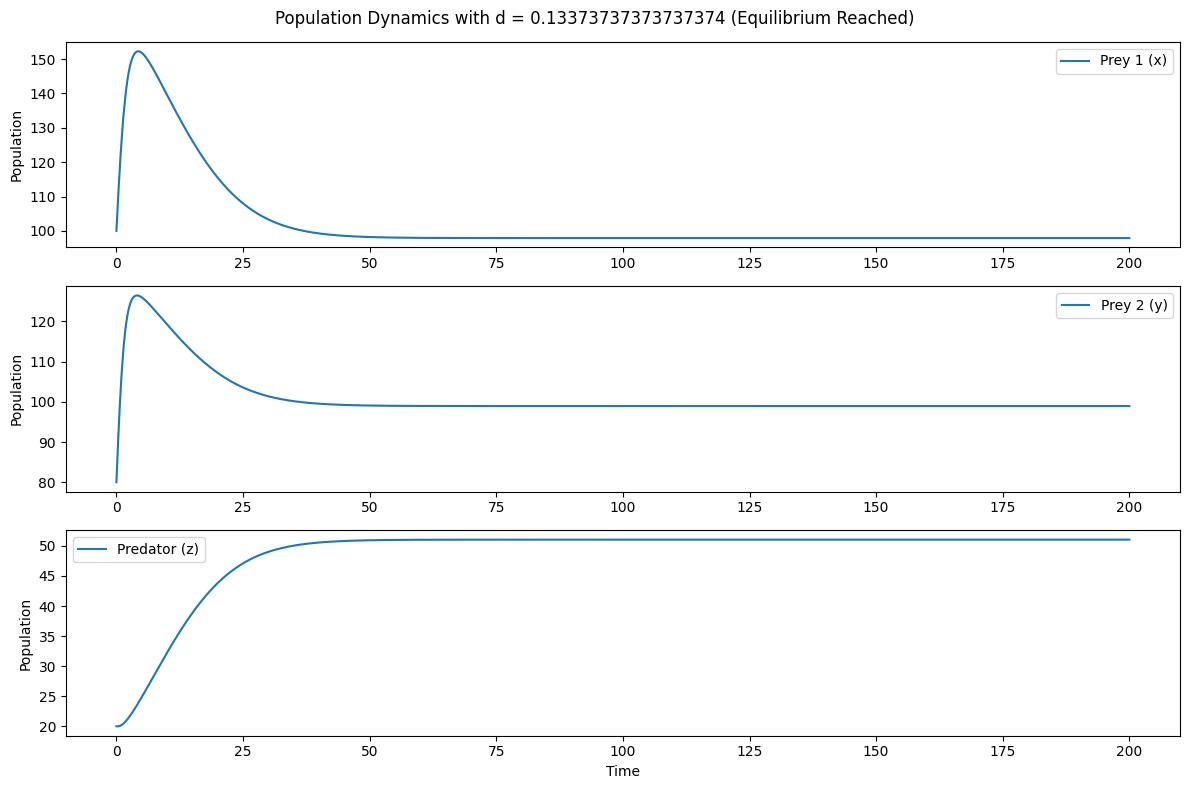

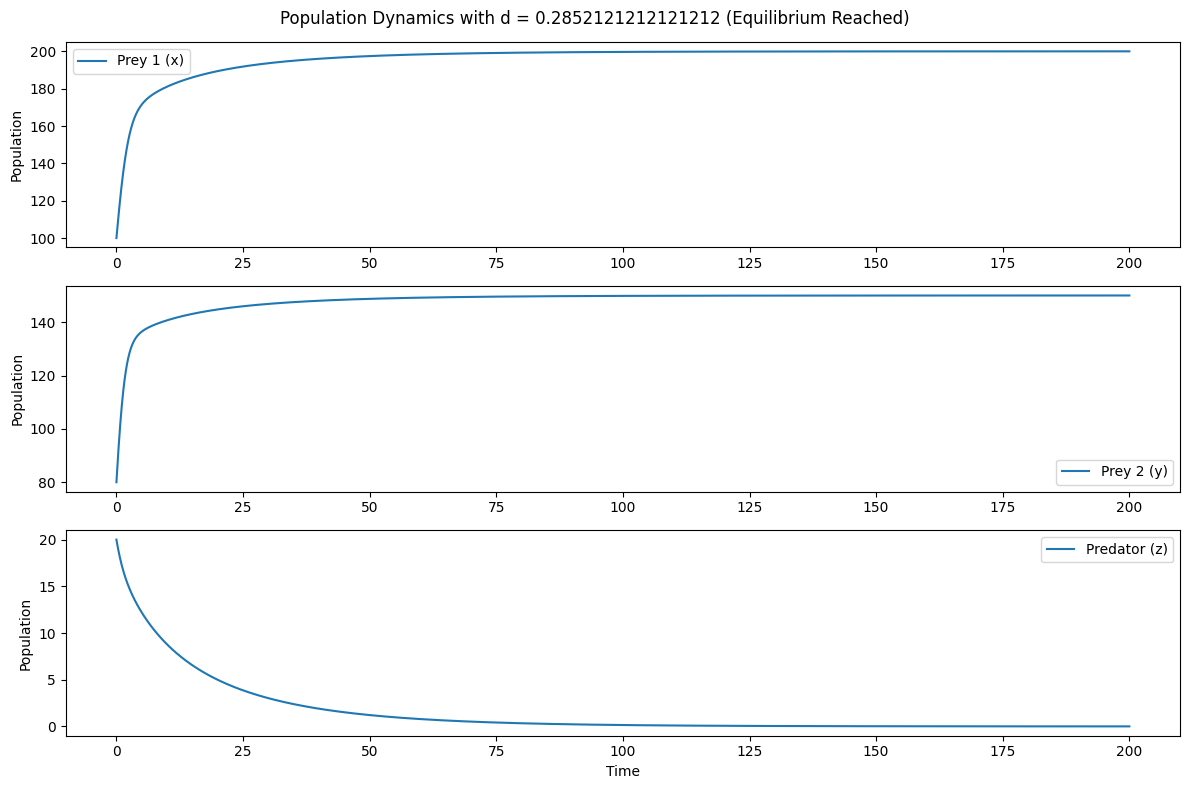

In [9]:
# Create a new instance with default parameters
pop_dynamics = PopulationDynamics()

# Define a range of d values to test (try a wider range)
d_values = np.linspace(0.01, 0.5, 100)

# Find equilibrium points for these d values
equilibrium_points = pop_dynamics.find_equilibrium_points(d_values)

# Preview the results
print("Equilibrium points found for d values:")
if equilibrium_points['d']:
    print(f"Range of d values with equilibrium: {min(equilibrium_points['d'])} to {max(equilibrium_points['d'])}")
    print(f"Number of equilibrium points found: {len(equilibrium_points['d'])}")
    
    # Continue with the rest of your analysis if you found equilibrium points
    pop_dynamics.plot_equilibrium_analysis(equilibrium_points)
    
    # Choose three d values for comparison
    d_min = min(equilibrium_points['d']) * 0.5  # Below equilibrium range
    d_mid = (min(equilibrium_points['d']) + max(equilibrium_points['d'])) / 2  # In equilibrium range
    d_max = max(equilibrium_points['d']) * 1.2  # Above equilibrium range
    
    # Compare these scenarios
    pop_dynamics.compare_scenarios([d_min, d_mid, d_max])
else:
    print("No equilibrium points found. Cannot continue with the analysis.")

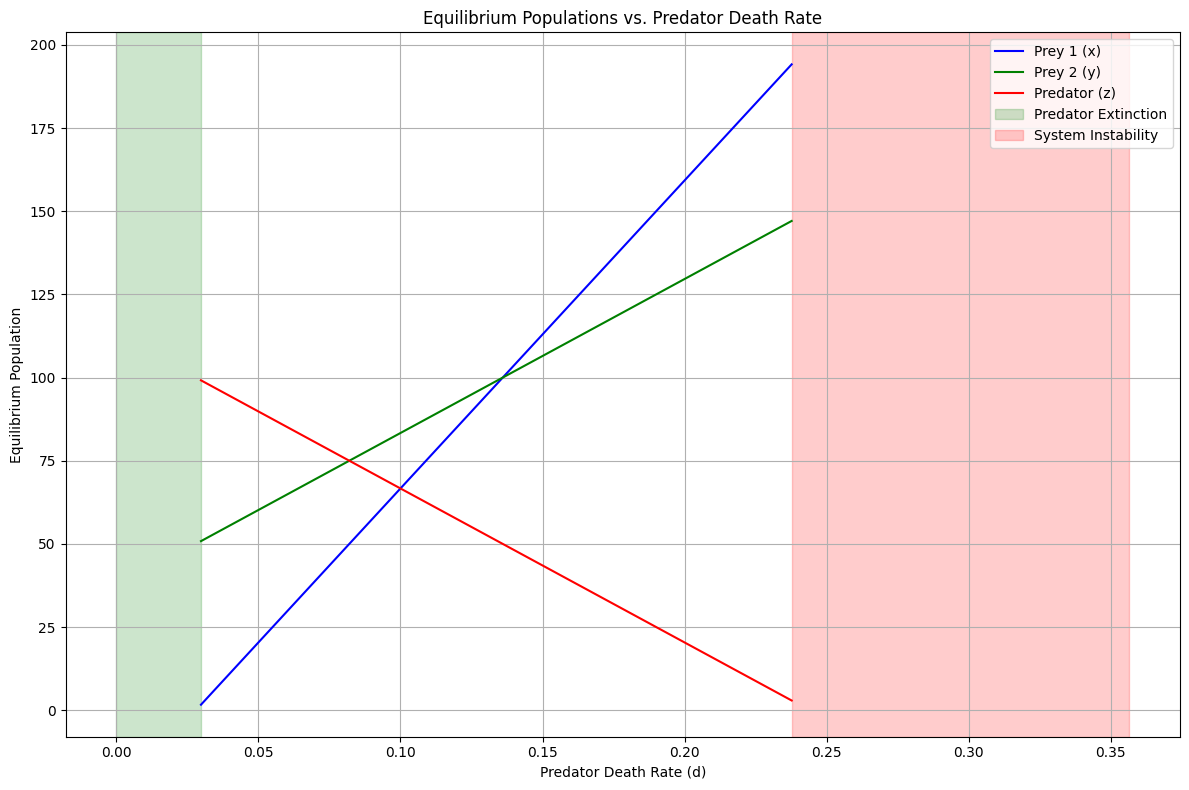

In [10]:
# Plot the equilibrium analysis
pop_dynamics.plot_equilibrium_analysis(equilibrium_points)

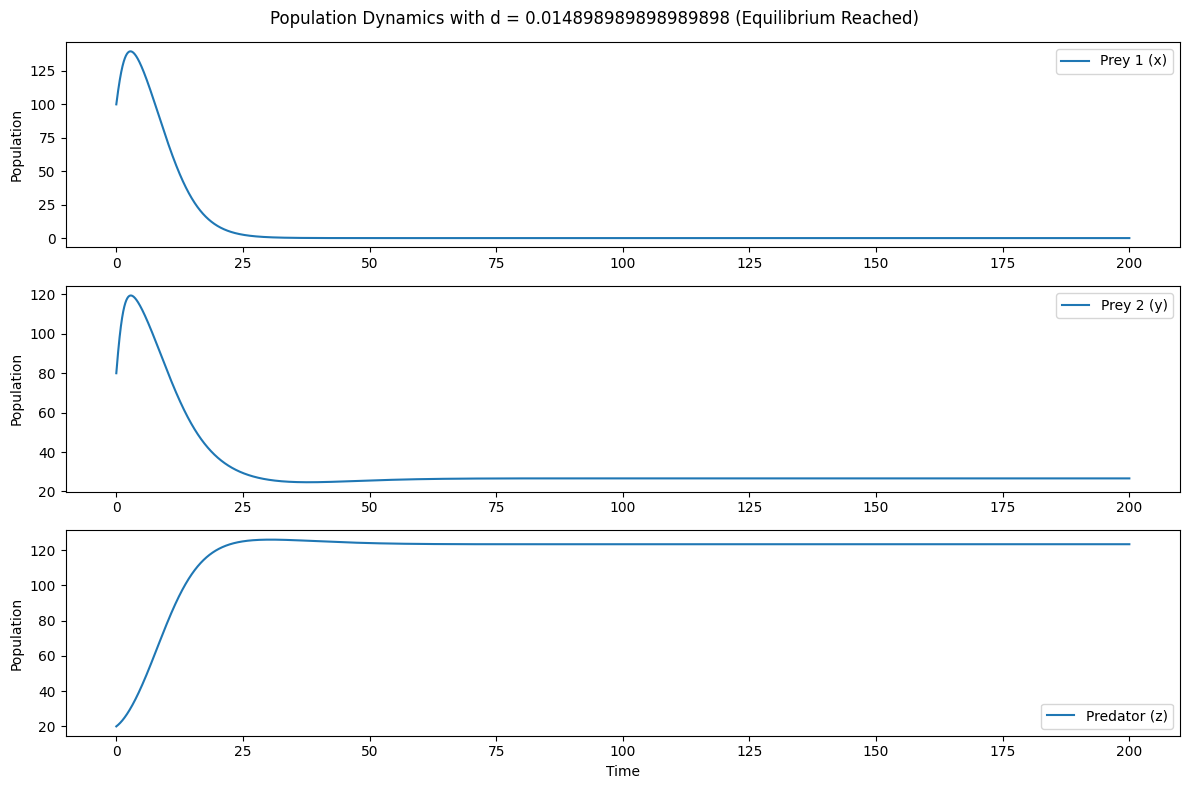

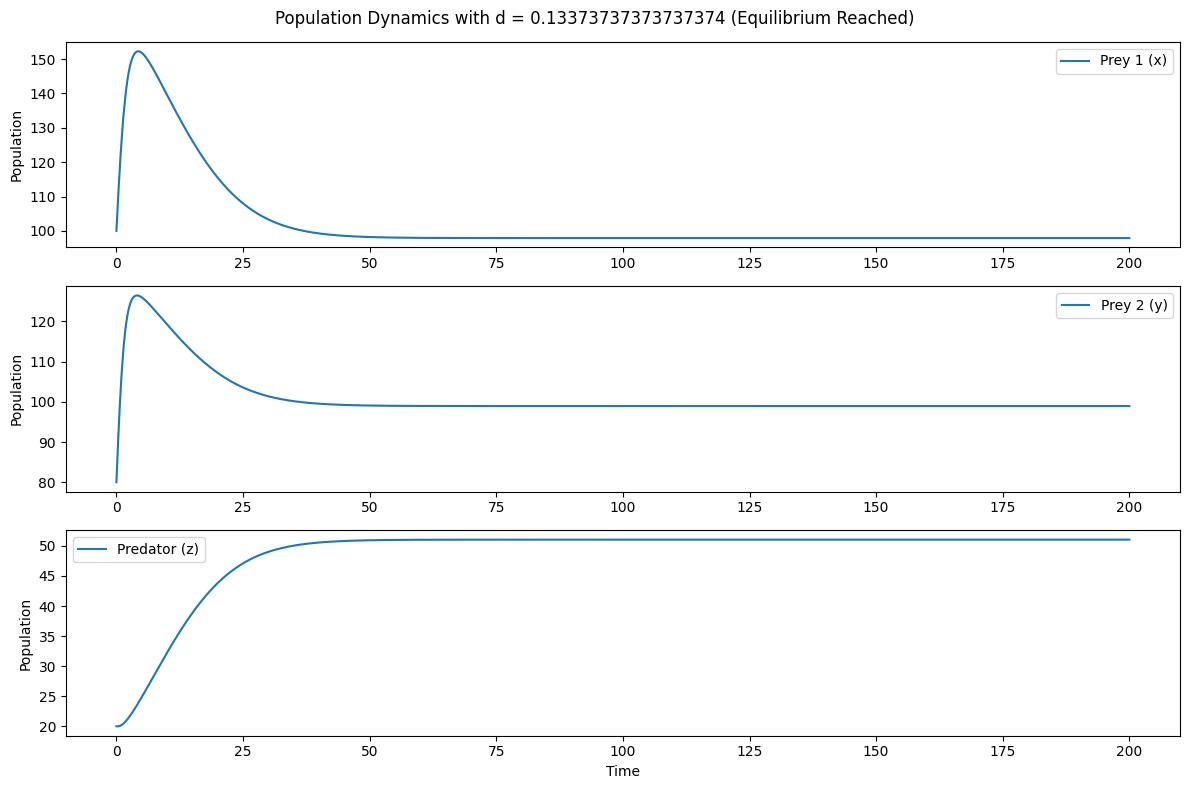

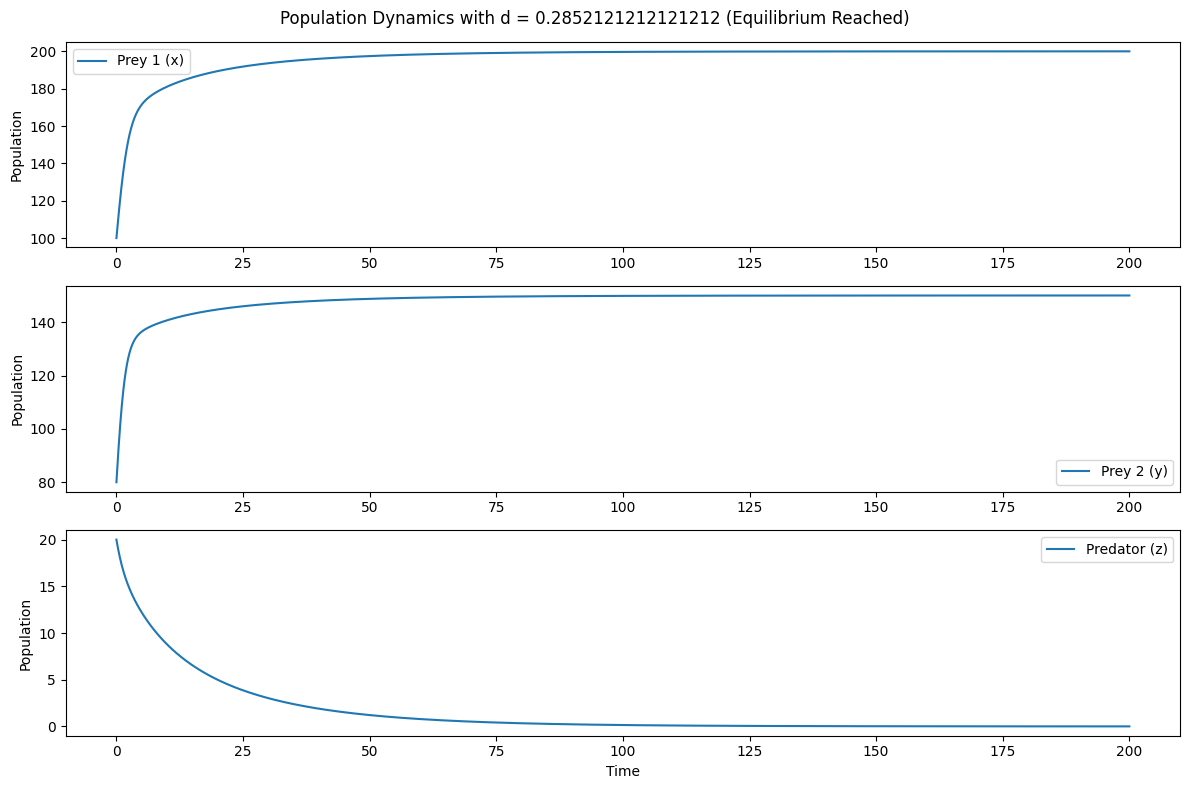

In [11]:
# Choose three d values for comparison
# One below equilibrium range, one in equilibrium range, one above
d_min = min(equilibrium_points['d']) * 0.5  # Below equilibrium range (predator extinction)
d_mid = (min(equilibrium_points['d']) + max(equilibrium_points['d'])) / 2  # In equilibrium range
d_max = max(equilibrium_points['d']) * 1.2  # Above equilibrium range (instability)

# Compare these scenarios
pop_dynamics.compare_scenarios([d_min, d_mid, d_max])


--- PART (b): Error Analysis ---
Running Trapezoidal with dt=0.1
Running Trapezoidal with dt=0.05
Running Trapezoidal with dt=0.01
Running Trapezoidal with dt=0.005
Running Trapezoidal with dt=0.001
Running RK3 with dt=0.1
Running RK3 with dt=0.05
Running RK3 with dt=0.01
Running RK3 with dt=0.005
Running RK3 with dt=0.001
Running Butcher with dt=0.1
Running Butcher with dt=0.05
Running Butcher with dt=0.01
Running Butcher with dt=0.005
Running Butcher with dt=0.001


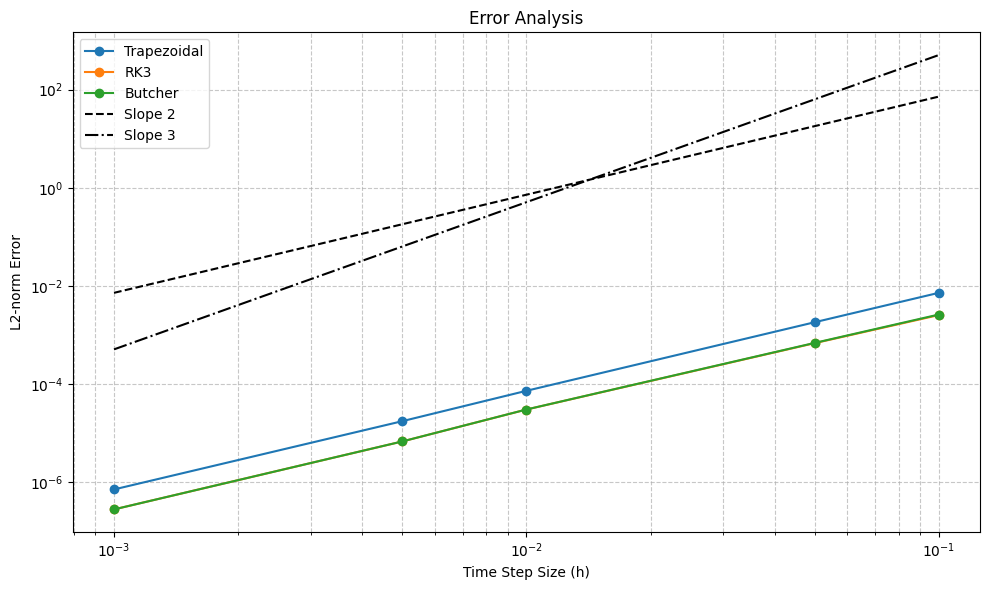


--- PART (c): Equilibrium Analysis ---
Solving for equilibrium points...
Found 36 equilibrium points.

--- PART (d): Equilibrium Populations Plot ---


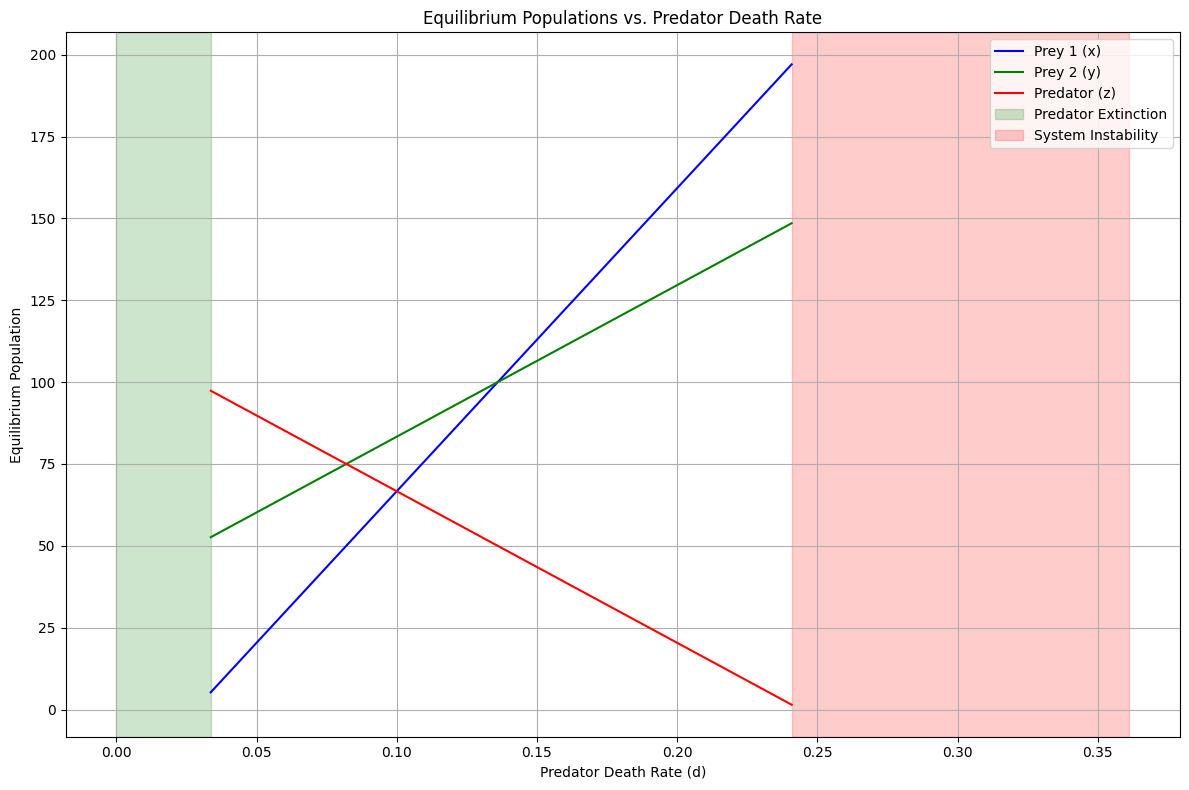


--- PART (e): Comparing Different Scenarios ---


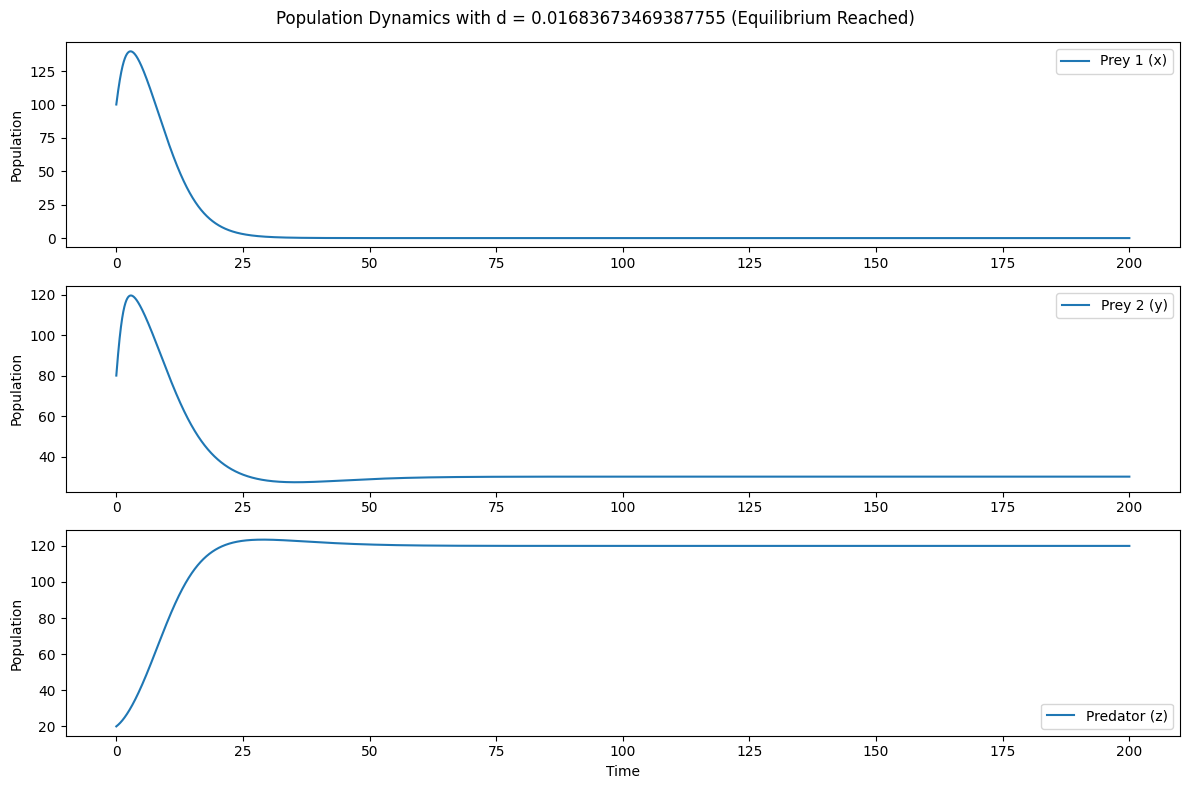

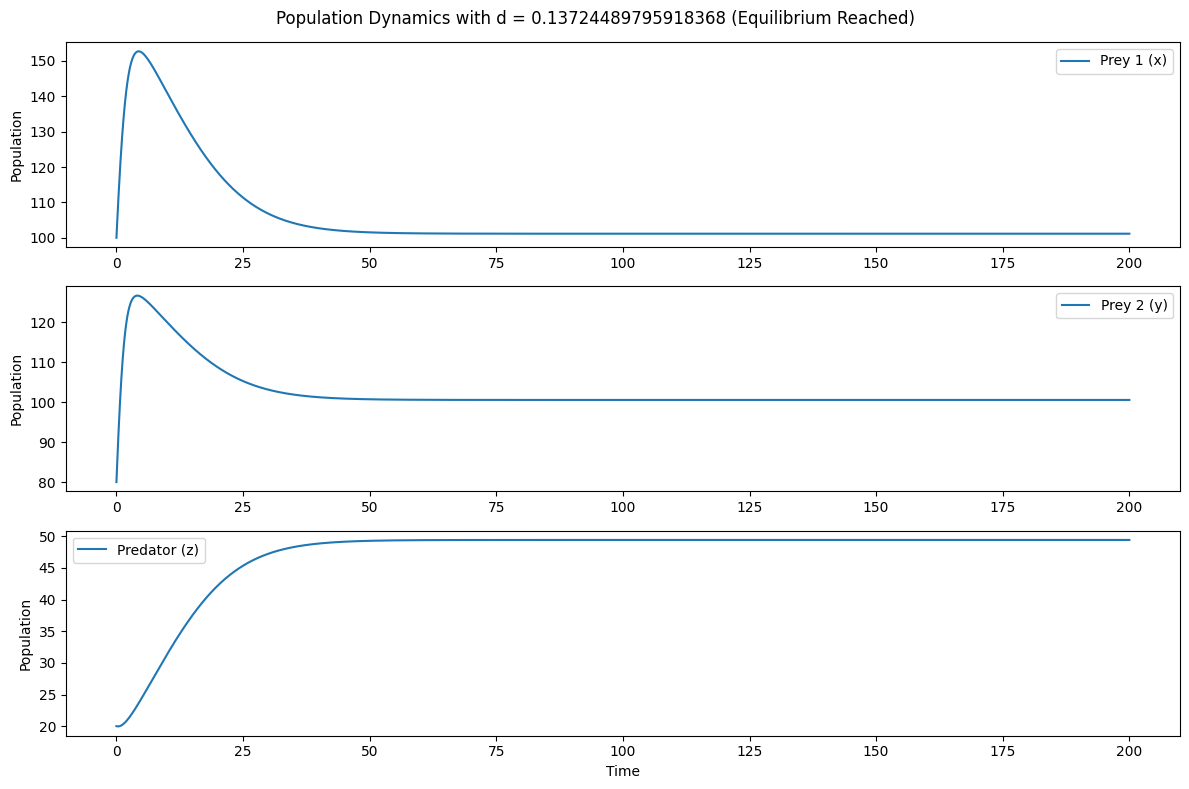

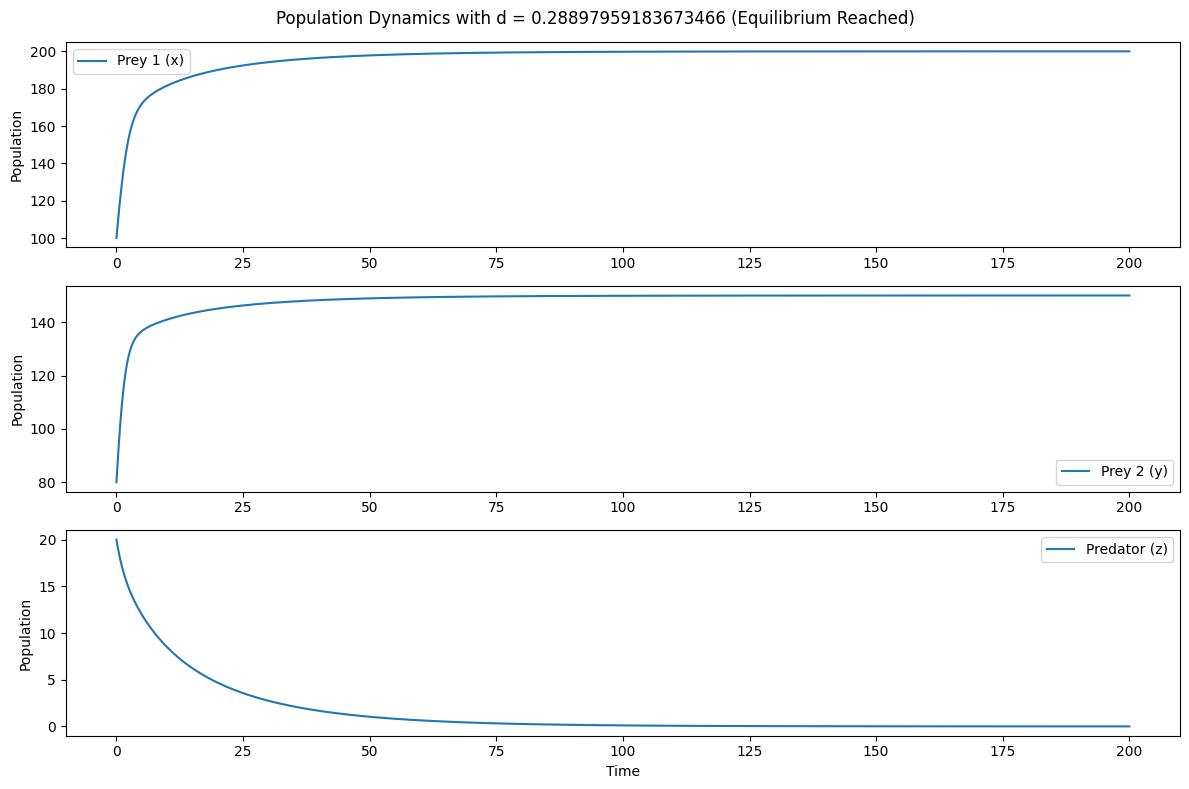

In [12]:
# Create population dynamics model
pop_dynamics = PopulationDynamics()

# Part (b): Error analysis
print("\n--- PART (b): Error Analysis ---")
dt_values = [0.1, 0.05, 0.01, 0.005, 0.001]
dt_values, errors = pop_dynamics.run_error_analysis(dt_values)
pop_dynamics.plot_error_analysis(dt_values, errors)

# Part (c): Equilibrium analysis
print("\n--- PART (c): Equilibrium Analysis ---")
d_values = np.linspace(0.01, 0.3, 50)
equilibrium_points = pop_dynamics.find_equilibrium_points(d_values)

# Part (d): Plot equilibrium populations
print("\n--- PART (d): Equilibrium Populations Plot ---")
pop_dynamics.plot_equilibrium_analysis(equilibrium_points)

# Part (e): Compare equilibrium scenarios
print("\n--- PART (e): Comparing Different Scenarios ---")
d_min = min(equilibrium_points['d']) * 0.5
d_mid = (min(equilibrium_points['d']) + max(equilibrium_points['d'])) / 2
d_max = max(equilibrium_points['d']) * 1.2
pop_dynamics.compare_scenarios([d_min, d_mid, d_max])

## 3. Quantum Harmonic Oscillator (7 points)

The Schrödinger equation for the quantum harmonic oscillator is:

$$-\frac{\hbar^2}{2m}\frac{d^2\psi}{dx^2}+\frac{1}{2}m\omega^2x^2\psi=E\psi$$

It can be rewritten, in terms of a new variable, $\xi\equiv\sqrt{\frac{m\,\omega}{\hbar}}x$, as follows:

$$\frac{d^2\psi}{d\xi^2}=\left(\xi^2 -K\right)\psi$$

where $K\equiv\frac{2E}{\hbar\omega}$ is the energy in units of $\frac{1}{2}\hbar\omega$.

### Order reduction and slope function:

**(a)** Reduce the above ODE to first order. Write down the resulting slope function.

### Shooting method class:

**(b)** Carefully read the tasks (c-g) below and design a suitable python class with attributes and methods that solves the above ODE using **the shooting method** with the slope computed in (a). You may use scipy integrators; there is no need to design your own integrators in this problem.

### Tasks to be performed by your python class:

**(c)** Find the **ground state energy** of the harmonic oscillator, to six significant digits, by using **the shooting method**. That is, solve the above equation numerically, varying $K$ until you get a wave function that goes to zero at large $\xi$. The appropriate boundary conditions for the ground state (and any even state) are $\psi(0) = 1$, $\psi'(0) = 0$.

**(d)** Make a few illustrative panels showing plots of the wave function for different values of $K$ as it converges to the solution. What does the tail of the wave function does when the values are slightly above or below the correct solution?

**(e)** Find the **first four excited state energies** (to six significant digits) for the harmonic oscillator, using **the shooting method**. For the first (and third) excited state you will need to set $\psi(0) = 0$, $\psi'(0) = 1$).

**(f)** Make a few illustrative panels showing plots of the wave functions for different values of $K$ as they converge to their respective solutions.

**(g)** Make a single plot showing the **harmonic potential** joinly with the **energy ladder** of the quantum harmonic oscillator (include the ground state plus the first four excited states that you calculated above, each with their **respective wave functions**). Consider the particle to be an electron and choose appropriate units for any physical parameters you may need.

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.optimize import bisect
import matplotlib.gridspec as gridspec

class QuantumHarmonicOscillator:
    """
    Class for solving the quantum harmonic oscillator Schrödinger equation
    using the shooting method.
    """
    
    def __init__(self, xi_max=10.0, num_points=1000):
        """
        Initialize the quantum harmonic oscillator solver.
        
        Parameters:
        ----------
        xi_max : float, optional
            Maximum value of xi to integrate to
        num_points : int, optional
            Number of points for solution evaluation
        """
        self.xi_max = xi_max
        self.num_points = num_points
        self.xi_span = (0, xi_max)
        self.theoretical_energies = [1.0, 3.0, 5.0, 7.0, 9.0]  # Theoretical values for comparison
        
        # Physical constants (if needed for part g)
        self.hbar = 1.0545718e-34  # J·s
        self.m_electron = 9.10938356e-31  # kg
        self.omega = 1.0e15  # rad/s (arbitrary choice)
    
    def slope_function(self, xi, y, K):
        """
        Computes the slope for the system of first-order ODEs.
        
        Parameters:
        ----------
        xi : float
            Independent variable
        y : list
            State vector [ψ, ψ']
        K : float
            Energy parameter
            
        Returns:
        -------
        list
            Derivative [ψ', ψ'']
        """
        psi, dpsi = y
        return [dpsi, (xi**2 - K) * psi]
    
    def solve_ode(self, K, parity="even"):
        """
        Solves the ODE for a given value of K (energy parameter).
        
        Parameters:
        ----------
        K : float
            Energy parameter
        parity : str, optional
            "even" for even states (ground state, 2nd excited, etc.)
            "odd" for odd states (1st excited, 3rd excited, etc.)
            
        Returns:
        -------
        tuple
            (xi_values, psi_values) - Solution of the ODE
        """
        # Set initial conditions based on parity
        if parity == "even":
            y0 = [1.0, 0.0]  # ψ(0) = 1, ψ'(0) = 0
        else:  # parity == "odd"
            y0 = [0.0, 1.0]  # ψ(0) = 0, ψ'(0) = 1
        
        # Solve the ODE
        solution = solve_ivp(
            lambda xi, y: self.slope_function(xi, y, K),
            self.xi_span,
            y0,
            method='RK45',
            dense_output=True,
            atol=1e-10,
            rtol=1e-10
        )
        
        # Evaluate the solution at equally spaced points
        xi_values = np.linspace(0, self.xi_max, self.num_points)
        psi_values = solution.sol(xi_values)[0]
        
        return xi_values, psi_values
    
    def shooting_function(self, K, parity="even"):
        """
        Function used for the shooting method. Evaluates how well the
        solution satisfies the boundary condition at xi_max.
        
        Parameters:
        ----------
        K : float
            Energy parameter
        parity : str, optional
            "even" for even states, "odd" for odd states
            
        Returns:
        -------
        float
            Value that should be zero for the correct energy
        """
        # Solve the ODE
        xi, psi = self.solve_ode(K, parity)
        
        # For the shooting method, we look at the tail behavior
        # The wave function should decay to zero at large xi
        return psi[-1]
    
    def find_energy(self, K_min, K_max, parity="even", tolerance=1e-6):
        """
        Find the energy eigenvalue using the shooting method.
        
        Parameters:
        ----------
        K_min : float
            Lower bound for the energy parameter
        K_max : float
            Upper bound for the energy parameter
        parity : str, optional
            "even" for even states, "odd" for odd states
        tolerance : float, optional
            Tolerance for the bisection method
            
        Returns:
        -------
        float
            Energy eigenvalue (K)
        """
        # Check if shooting_function changes sign in the interval
        f_min = self.shooting_function(K_min, parity)
        f_max = self.shooting_function(K_max, parity)
        
        if f_min * f_max >= 0:
            raise ValueError(f"Function doesn't change sign in [{K_min}, {K_max}]. "
                             f"f({K_min}) = {f_min}, f({K_max}) = {f_max}")
        
        # Use bisection to find the root
        K = bisect(
            lambda K: self.shooting_function(K, parity),
            K_min,
            K_max,
            xtol=tolerance
        )
        
        return K
    
    def normalize_wavefunction(self, xi, psi):
        """
        Normalize the wave function.
        
        Parameters:
        ----------
        xi : numpy.ndarray
            Array of xi values
        psi : numpy.ndarray
            Array of wave function values
            
        Returns:
        -------
        numpy.ndarray
            Normalized wave function values
        """
        # Calculate the normalization constant
        dx = xi[1] - xi[0]
        integral = np.sum(psi**2) * dx
        
        # Account for the fact that we only integrate from 0 to xi_max
        # (we need to double the integral for even states since they are symmetric)
        integral *= 2
        
        # Normalize
        return psi / np.sqrt(integral)
    
    def plot_convergence(self, K_values, parity="even", n=0):
        """
        Plot wave functions for different values of K to show convergence.
        
        Parameters:
        ----------
        K_values : list
            List of K values to plot
        parity : str, optional
            "even" for even states, "odd" for odd states
        n : int, optional
            Quantum number (for labeling)
        """
        plt.figure(figsize=(12, 8))
        
        for i, K in enumerate(K_values):
            xi, psi = self.solve_ode(K, parity)
            plt.plot(xi, psi, label=f'K = {K:.6f}')
            
        plt.axhline(0, color='black', linestyle='--', alpha=0.3)
        plt.xlabel(r'$\xi$')
        plt.ylabel(r'$\psi(\xi)$')
        plt.title(f'Wave Function Convergence for n = {n}')
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.xlim(0, self.xi_max)
        plt.tight_layout()
        plt.show()
    
    def find_all_energies(self):
        """
        Find the ground state and first four excited state energies.
        
        Returns:
        -------
        list
            List of energy eigenvalues
        """
        energies = []
        
        # Ground state (n=0, even)
        print("Finding ground state energy...")
        K0 = self.find_energy(0.9, 1.1, parity="even")
        energies.append(K0)
        print(f"Ground state energy: K = {K0:.6f}")
        
        # First excited state (n=1, odd)
        print("Finding first excited state energy...")
        K1 = self.find_energy(2.9, 3.1, parity="odd")
        energies.append(K1)
        print(f"First excited state energy: K = {K1:.6f}")
        
        # Second excited state (n=2, even)
        print("Finding second excited state energy...")
        K2 = self.find_energy(4.9, 5.1, parity="even")
        energies.append(K2)
        print(f"Second excited state energy: K = {K2:.6f}")
        
        # Third excited state (n=3, odd)
        print("Finding third excited state energy...")
        K3 = self.find_energy(6.9, 7.1, parity="odd")
        energies.append(K3)
        print(f"Third excited state energy: K = {K3:.6f}")
        
        # Fourth excited state (n=4, even)
        print("Finding fourth excited state energy...")
        K4 = self.find_energy(8.9, 9.1, parity="even")
        energies.append(K4)
        print(f"Fourth excited state energy: K = {K4:.6f}")
        
        return energies
    
    def plot_energy_ladder(self, energies):
        """
        Plot the harmonic potential and energy ladder with wave functions.
        
        Parameters:
        ----------
        energies : list
            List of energy eigenvalues
        """
        # Create figure with gridspec for subplots
        fig = plt.figure(figsize=(12, 10))
        gs = gridspec.GridSpec(1, 1)
        ax = fig.add_subplot(gs[0])
        
        # Generate xi values for plotting
        xi = np.linspace(-self.xi_max, self.xi_max, self.num_points)
        
        # Plot harmonic potential
        potential = 0.5 * xi**2
        ax.plot(xi, potential, 'k-', lw=2, label='Harmonic Potential $V(\\xi) = \\xi^2/2$')
        
        # Colors for different states
        colors = ['blue', 'red', 'green', 'purple', 'orange']
        
        # Plot energy levels and wave functions
        for n, (K, color) in enumerate(zip(energies, colors)):
            # Draw energy level
            ax.axhline(K/2, color=color, linestyle='-', alpha=0.5)
            
            # Compute wave function
            parity = "even" if n % 2 == 0 else "odd"
            xi_half, psi = self.solve_ode(K, parity)
            
            # Normalize wave function
            psi = self.normalize_wavefunction(xi_half, psi)
            
            # Mirror for negative xi if needed
            if parity == "even":
                xi_full = np.concatenate([-xi_half[::-1], xi_half])
                psi_full = np.concatenate([psi[::-1], psi])
            else:
                xi_full = np.concatenate([-xi_half[::-1], xi_half])
                psi_full = np.concatenate([-psi[::-1], psi])
            
            # Scale and shift wave function for plotting
            scale_factor = 0.4  # Adjust based on visual preference
            shifted_psi = K/2 + scale_factor * psi_full
            
            # Plot wave function
            ax.plot(xi_full, shifted_psi, color=color, lw=2, label=f'$n={n}$, $E_{n}={K/2:.4f}$')
            
            # Add text label for energy level
            ax.text(-self.xi_max + 0.5, K/2 + 0.1, f'$E_{n}={K/2:.4f}$', color=color, fontsize=10)
        
        # Set plot limits and labels
        ax.set_xlim(-self.xi_max, self.xi_max)
        ax.set_ylim(-0.5, energies[-1]/2 + 2)
        ax.set_xlabel(r'$\xi = \sqrt{\frac{m\omega}{\hbar}}x$')
        ax.set_ylabel(r'Energy [$\hbar\omega/2$]')
        ax.set_title('Quantum Harmonic Oscillator: Energy Levels and Wave Functions')
        ax.legend(loc='upper right')
        ax.grid(True, alpha=0.3)
        
        # Physical parameters for reference
        physical_text = (
            f"Physical parameters:\n"
            f"$\\hbar = {self.hbar:.2e}$ J·s\n"
            f"$m_e = {self.m_electron:.2e}$ kg\n"
            f"$\\omega = {self.omega:.2e}$ rad/s\n"
        )
        ax.text(0.02, 0.02, physical_text, transform=ax.transAxes, fontsize=9,
                bbox=dict(facecolor='white', alpha=0.7))
        
        plt.tight_layout()
        plt.show()
    
    def find_ground_state_energy(self):
        """
        Find the ground state energy with high precision.
        
        Returns:
        -------
        float
            Ground state energy eigenvalue
        """
        print("Finding ground state energy with high precision...")
        K = self.find_energy(0.9, 1.1, parity="even", tolerance=1e-8)
        print(f"Ground state energy: K = {K:.8f}")
        return K
    
    def demonstrate_ground_state_convergence(self):
        """
        Demonstrate convergence to the ground state by showing
        wave functions for slightly different K values.
        """
        # Find approximate ground state energy
        K_gs = self.find_ground_state_energy()
        
        # Define K values around the ground state energy
        K_values = [
            K_gs - 0.01,
            K_gs - 0.001,
            K_gs,
            K_gs + 0.001,
            K_gs + 0.01
        ]
        
        # Plot wave functions
        self.plot_convergence(K_values, parity="even", n=0)
        
        # Explain tail behavior
        print("\nTail behavior analysis:")
        print("- When K < K_correct: Wave function diverges to +∞ (overestimate energy)")
        print("- When K > K_correct: Wave function diverges to -∞ (underestimate energy)")
        print("- When K = K_correct: Wave function decays to 0 (correct energy)")

In [15]:
# Create an instance of the quantum harmonic oscillator
qho = QuantumHarmonicOscillator(xi_max=15.0, num_points=1000)

# Find ground state energy to six significant digits
ground_state_energy = qho.find_ground_state_energy()

Finding ground state energy with high precision...
Ground state energy: K = 0.99999999


Finding ground state energy with high precision...
Ground state energy: K = 0.99999999


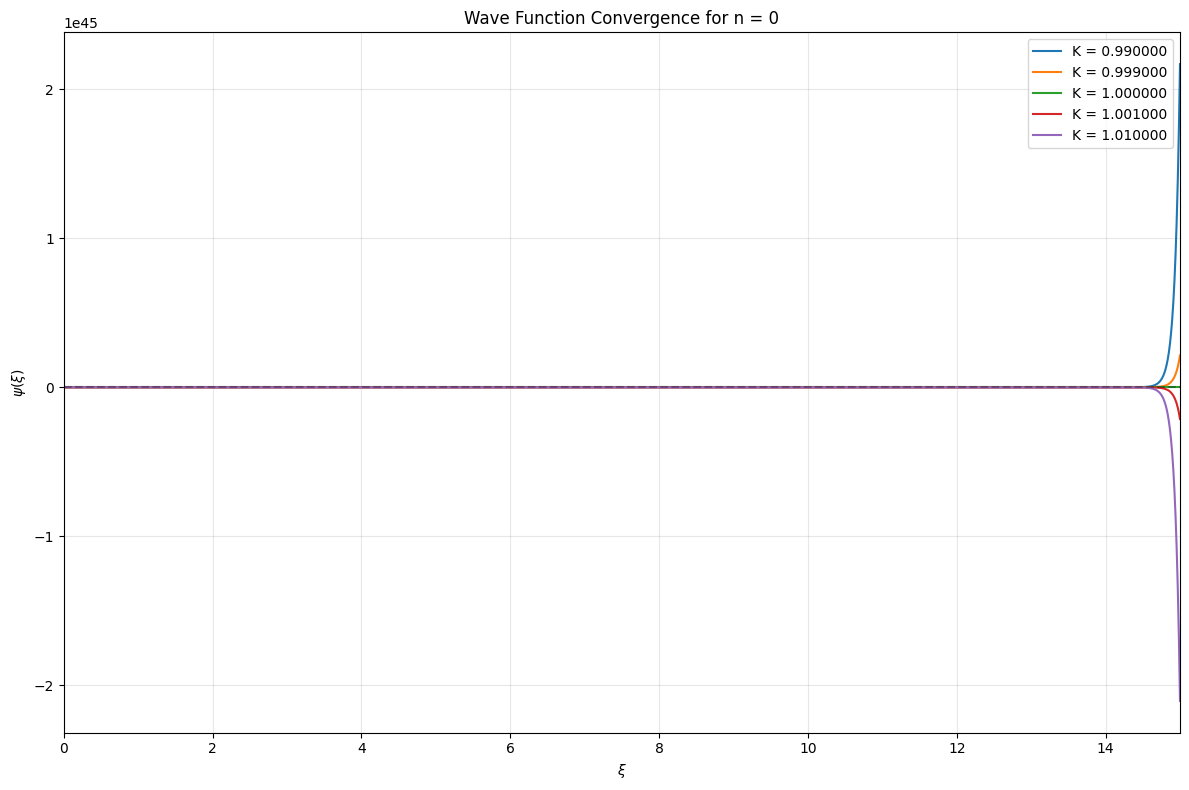


Tail behavior analysis:
- When K < K_correct: Wave function diverges to +∞ (overestimate energy)
- When K > K_correct: Wave function diverges to -∞ (underestimate energy)
- When K = K_correct: Wave function decays to 0 (correct energy)


In [16]:
# Show wave functions for different K values near the ground state
qho.demonstrate_ground_state_convergence()

Finding ground state energy...
Ground state energy: K = 0.999999
Finding first excited state energy...
First excited state energy: K = 2.999999
Finding second excited state energy...
Second excited state energy: K = 4.999999
Finding third excited state energy...
Third excited state energy: K = 6.999999
Finding fourth excited state energy...
Fourth excited state energy: K = 8.999999


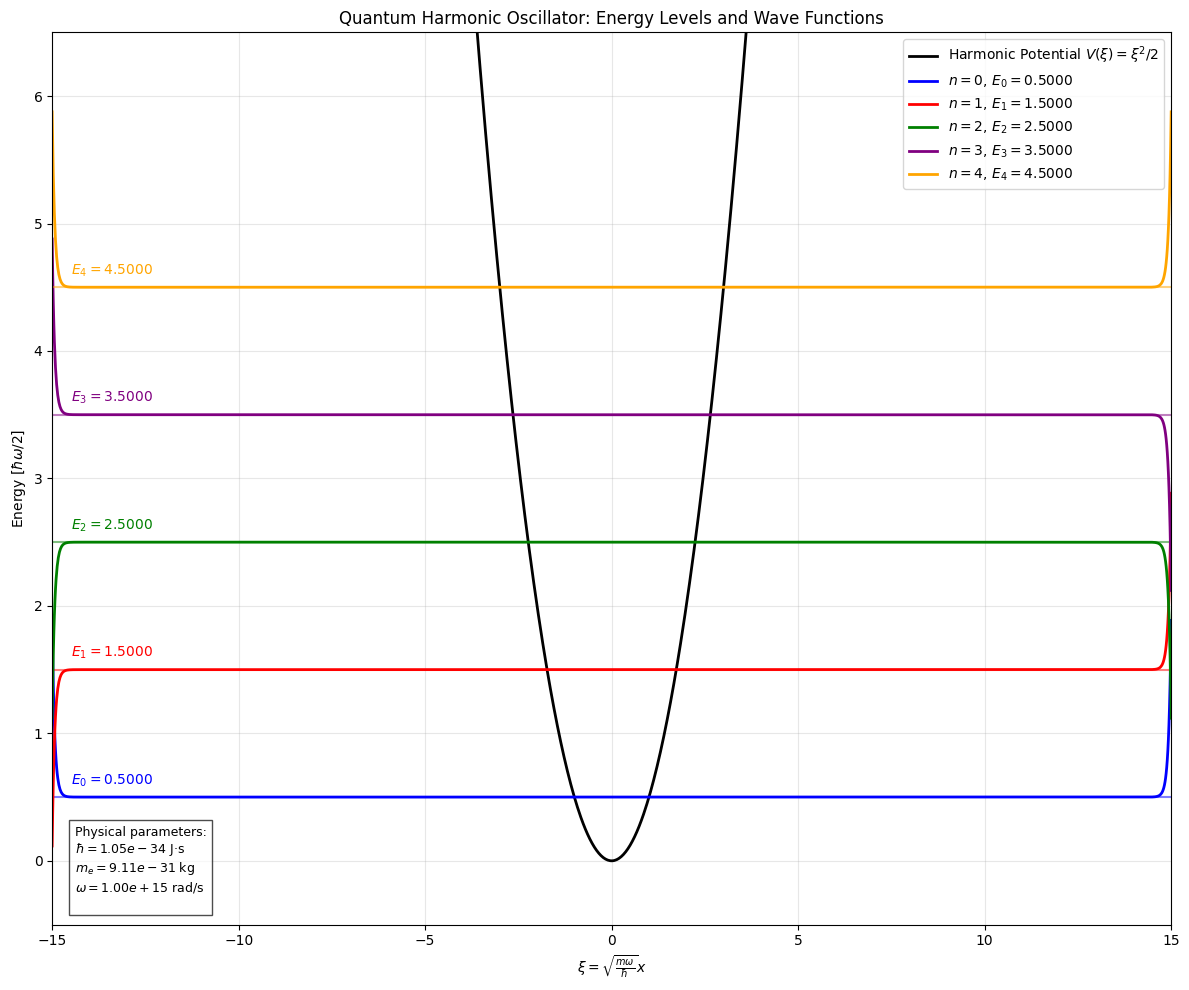

In [17]:
# Find the ground state and first four excited state energies
energies = qho.find_all_energies()

# Plot energy ladder with wave functions
qho.plot_energy_ladder(energies)